In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import lognorm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# for selecting the best bandwidth, we create a linear space of bandwidth values
bandwidths = np.linspace(0.001, 1.0, 20)

In [7]:
# run KDE for given X values and true densities, with selected bandwidth and kernel

def kde_fit(x_values, true_dens, x_plot, bandwidth, kernel):
  # create the KDE model
  kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(x_values)
  # estimate log of densities
  log_dens = kde.score_samples(x_plot)
  # estimated densities
  estimated_dens = np.exp(log_dens)

  true_dens_flat = true_dens.flatten()

  # calculate the mean squared error
  mse = np.mean((estimated_dens - true_dens_flat) ** 2)
  total_log_likelihood = np.sum(log_dens)

  if bandwidth == 'scott' or bandwidth == 'silverman':
    print(f"KDE with bandwidth={bandwidth} and kernel={kernel}:")
  else:
    print(f"KDE with bandwidth={bandwidth:.4f} and kernel={kernel}:")
  print(f"MSE error: {mse:.6f}, total log-likelihood: {total_log_likelihood:.6f}")

  # plot the true and estimated density functions
  plt.plot(x_plot, true_dens_flat, label='True density')
  plt.plot(x_plot, estimated_dens, label='Estimated density')
  if bandwidth == 'scott' or bandwidth == 'silverman':
    plt.title(f'bandwidth = {bandwidth}, MSE={mse:.6f}')
  else:
    plt.title(f'bandwidth = {bandwidth:.4f}, MSE={mse:.6f}')
  plt.legend()
  plt.show()

  return mse, total_log_likelihood

KDE with bandwidth=0.0010 and kernel=gaussian:
MSE error: 0.000605, total log-likelihood: -36706478.253785


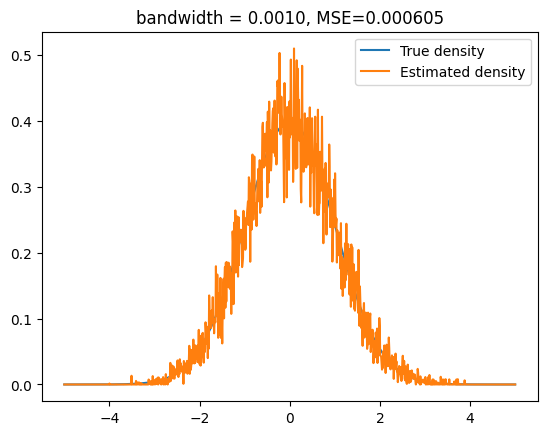

KDE with bandwidth=0.0536 and kernel=gaussian:
MSE error: 0.000010, total log-likelihood: -17392.600170


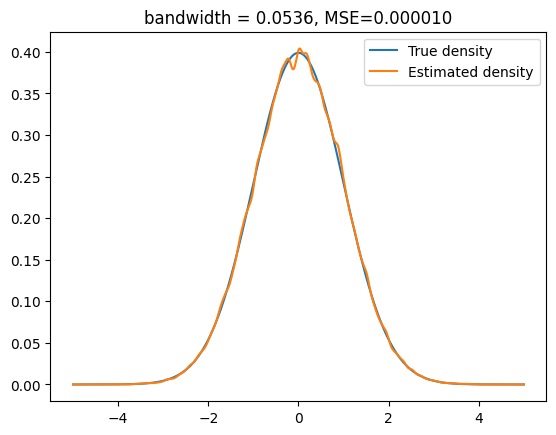

KDE with bandwidth=0.1062 and kernel=gaussian:
MSE error: 0.000005, total log-likelihood: -7970.775960


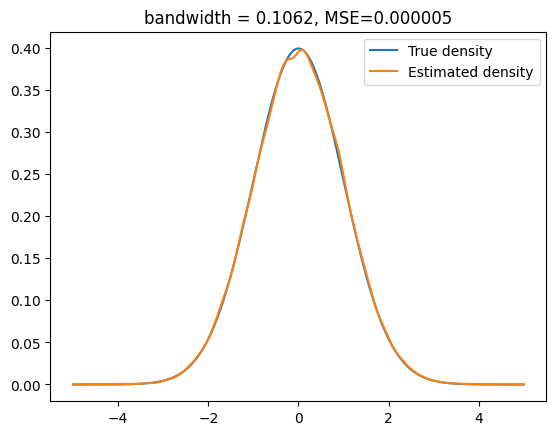

KDE with bandwidth=0.1587 and kernel=gaussian:
MSE error: 0.000006, total log-likelihood: -6182.940750


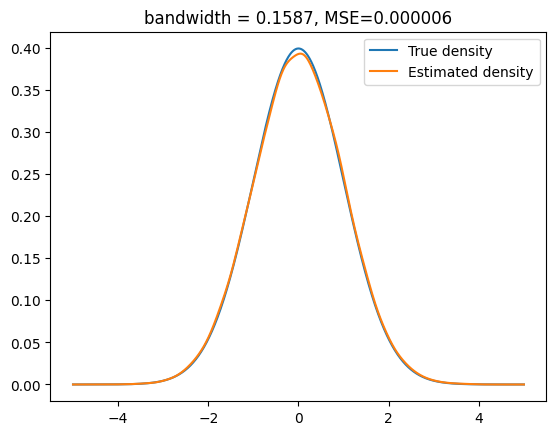

KDE with bandwidth=0.2113 and kernel=gaussian:
MSE error: 0.000013, total log-likelihood: -5517.599773


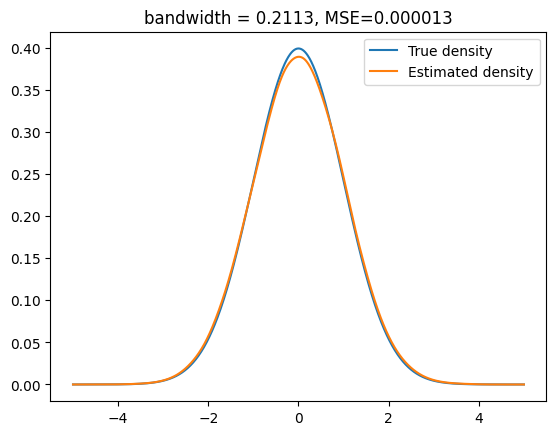

KDE with bandwidth=0.2639 and kernel=gaussian:
MSE error: 0.000027, total log-likelihood: -5168.764046


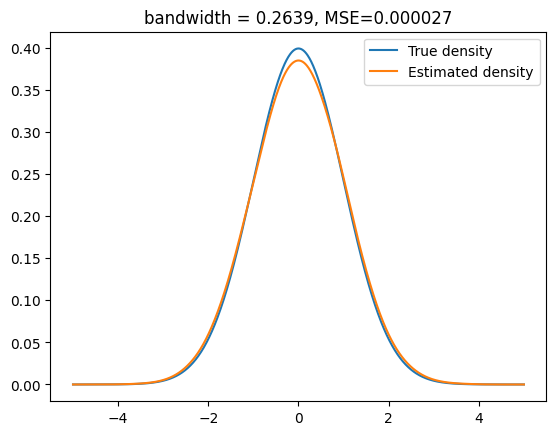

KDE with bandwidth=0.3165 and kernel=gaussian:
MSE error: 0.000051, total log-likelihood: -4938.239593


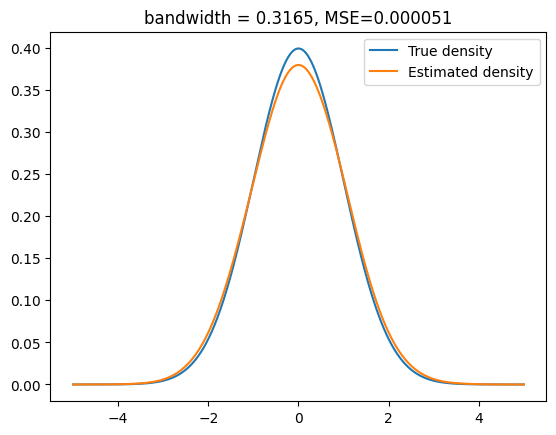

KDE with bandwidth=0.3691 and kernel=gaussian:
MSE error: 0.000088, total log-likelihood: -4759.286858


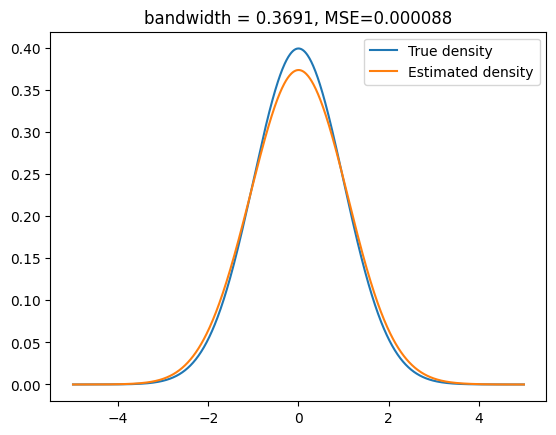

KDE with bandwidth=0.4216 and kernel=gaussian:
MSE error: 0.000141, total log-likelihood: -4605.341924


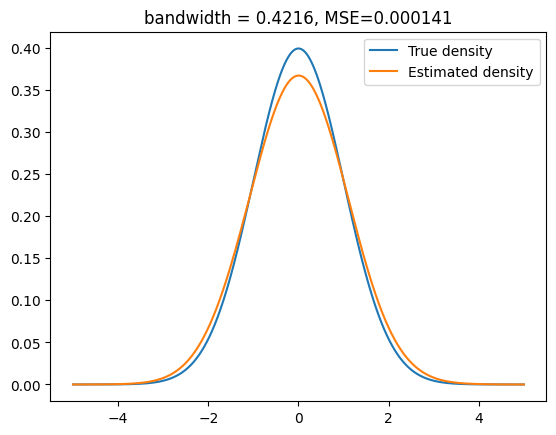

KDE with bandwidth=0.4742 and kernel=gaussian:
MSE error: 0.000212, total log-likelihood: -4464.696682


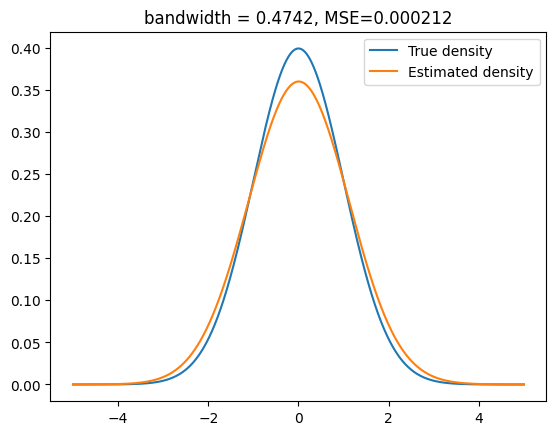

KDE with bandwidth=0.5268 and kernel=gaussian:
MSE error: 0.000304, total log-likelihood: -4331.866021


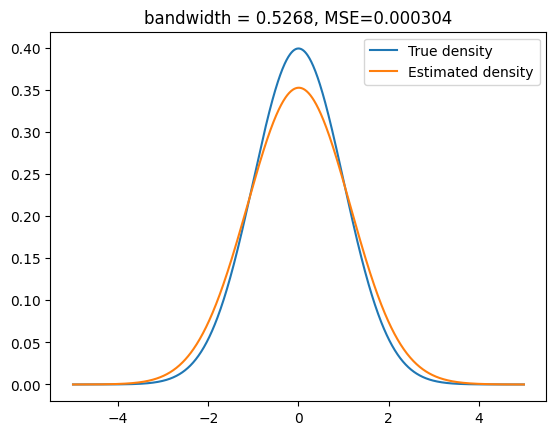

KDE with bandwidth=0.5794 and kernel=gaussian:
MSE error: 0.000417, total log-likelihood: -4204.321673


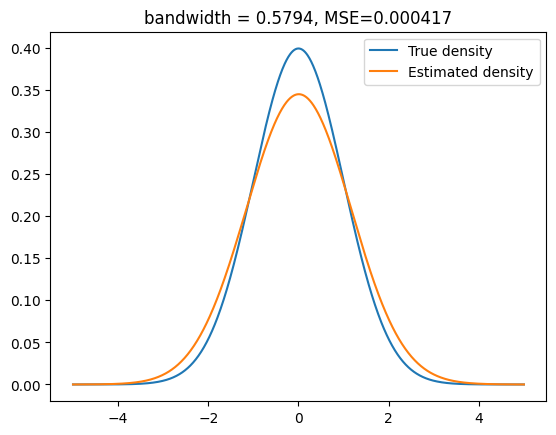

KDE with bandwidth=0.6319 and kernel=gaussian:
MSE error: 0.000552, total log-likelihood: -4081.101073


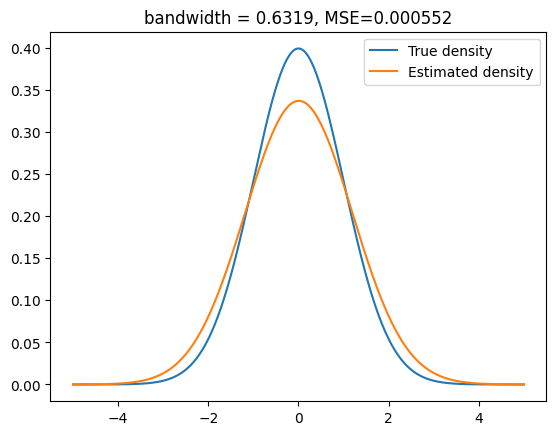

KDE with bandwidth=0.6845 and kernel=gaussian:
MSE error: 0.000710, total log-likelihood: -3962.087504


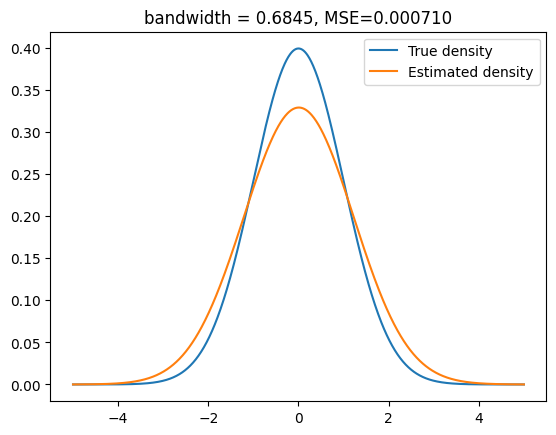

KDE with bandwidth=0.7371 and kernel=gaussian:
MSE error: 0.000891, total log-likelihood: -3847.572810


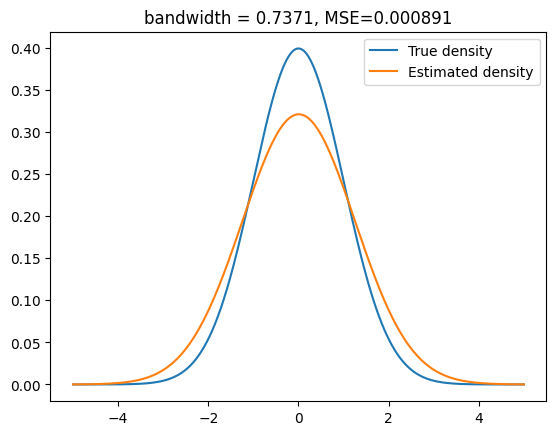

KDE with bandwidth=0.7897 and kernel=gaussian:
MSE error: 0.001093, total log-likelihood: -3737.984044


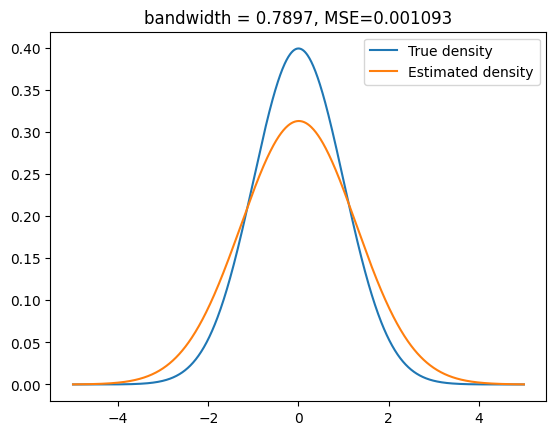

KDE with bandwidth=0.8423 and kernel=gaussian:
MSE error: 0.001316, total log-likelihood: -3633.726284


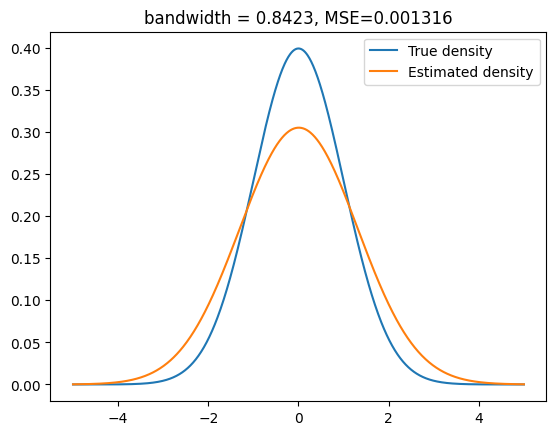

KDE with bandwidth=0.8948 and kernel=gaussian:
MSE error: 0.001558, total log-likelihood: -3535.106788


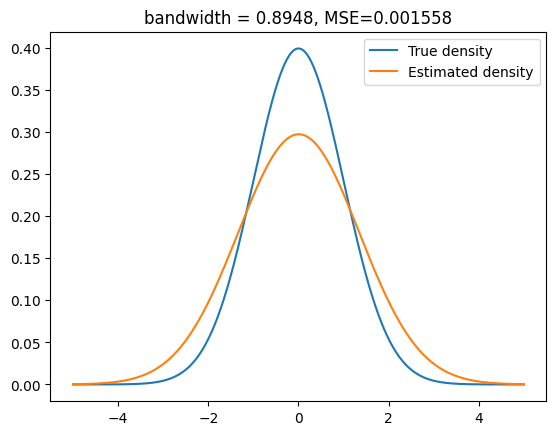

KDE with bandwidth=0.9474 and kernel=gaussian:
MSE error: 0.001818, total log-likelihood: -3442.310315


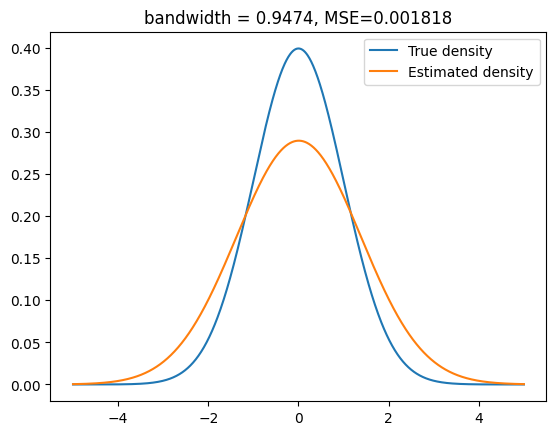

KDE with bandwidth=1.0000 and kernel=gaussian:
MSE error: 0.002093, total log-likelihood: -3355.402500


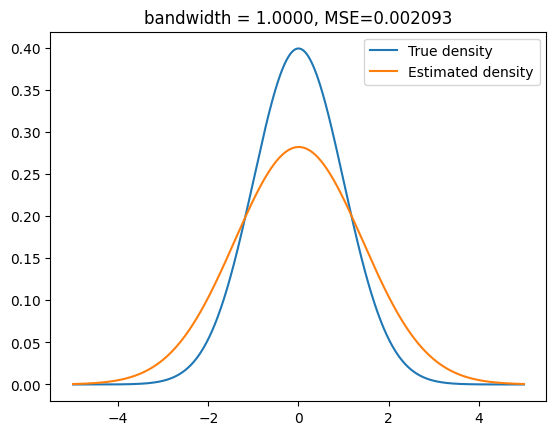

KDE with bandwidth=scott and kernel=gaussian:
MSE error: 0.000005, total log-likelihood: -7502.127750


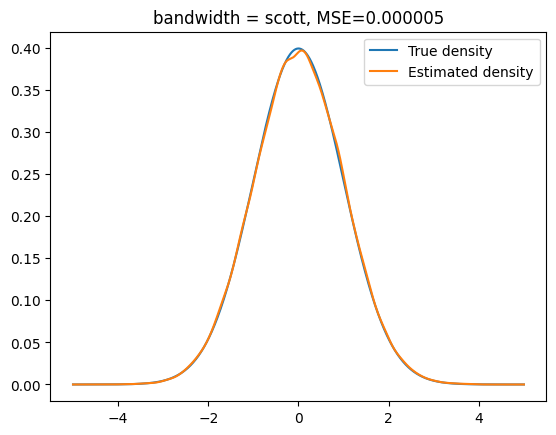

KDE with bandwidth=silverman and kernel=gaussian:
MSE error: 0.000005, total log-likelihood: -7203.453720


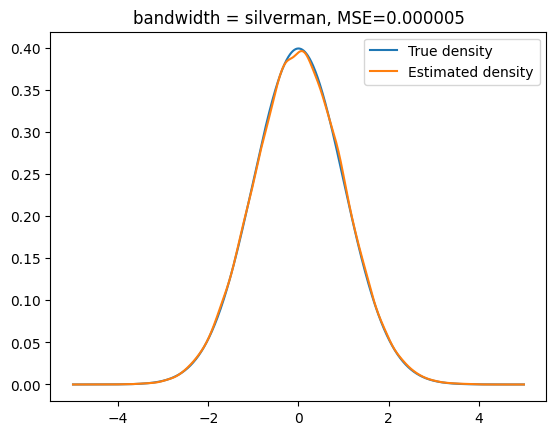

grid search bw = 0.112
KDE with bandwidth=0.1120 and kernel=gaussian:
MSE error: 0.000005, total log-likelihood: -7644.566522


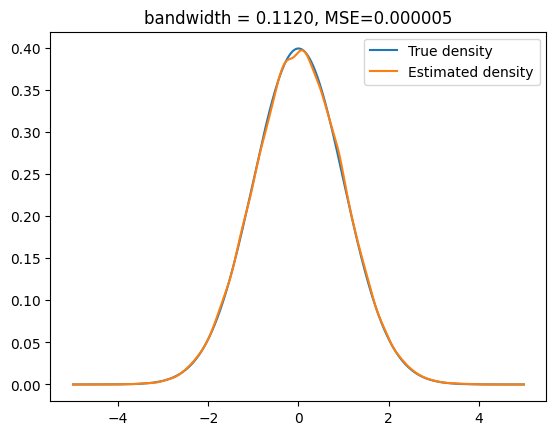

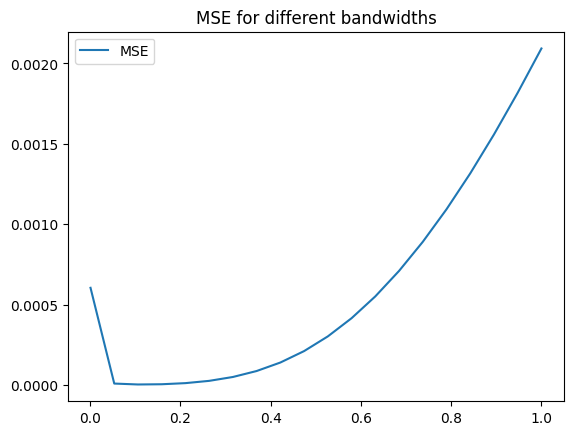

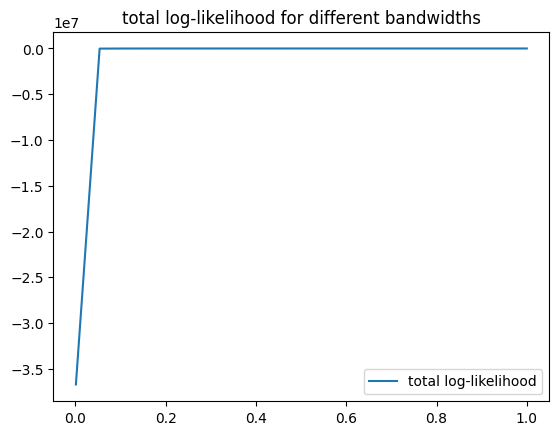

Histogram baseline: MSE error = 0.000039, total log-likelihood: -5226.0494


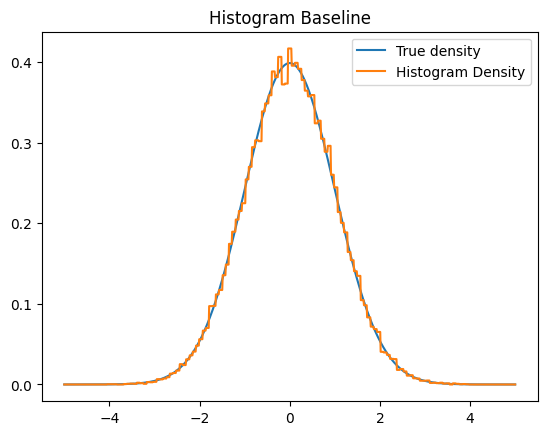

In [8]:
# test KDE for known distributions

# generate values from normal distribution with std=1
std = 1.0
x_values = np.random.normal(loc=0, scale=std, size=50000).reshape(-1, 1)
x_plot = np.linspace(-5, 5, 1000)[:, np.newaxis]

# Compute the actual probabilities using the normal distribution
true_dens = norm.pdf(x_plot, scale=std)
mse_results = []
total_log_likelihood_results = []

for bw in bandwidths:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=bw, kernel='gaussian')
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

# scott and silverman
mse_scott = kde_fit(x_values, true_dens, x_plot, bandwidth='scott', kernel='gaussian')
mse_silverman = kde_fit(x_values, true_dens, x_plot, bandwidth='silverman', kernel='gaussian')

# grid search
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': np.linspace(0.001, 1.0, 10)},
                    cv=5) # 5-fold cross-validation

grid_search_bw = 0.112 # pre-computed value (uncomment to run gridSearchCV)
# grid.fit(x_values)
# grid_search_bw = grid.best_params_["bandwidth"]
print(f'grid search bw = {grid_search_bw}')
kde_fit(x_values, true_dens, x_plot, bandwidth=grid_search_bw, kernel='gaussian')

plt.plot(bandwidths, mse_results, label='MSE')
plt.title('MSE for different bandwidths')
plt.legend()
plt.show()

plt.plot(bandwidths, total_log_likelihood_results, label='total log-likelihood')
plt.title('total log-likelihood for different bandwidths')
plt.legend()
plt.show()

# compare to histogram baseline
hist, bins = np.histogram(x_values.flatten(), bins='auto', density=True, range=(-5, 5))
bin_indices = [np.searchsorted(bins, value) for value in x_plot.flatten()]
bins_width = bins[1] - bins[0]
hist_estimated_dens = np.array([hist[index - 1] for index in bin_indices])
hist_estimated_dens_without_zeros = hist_estimated_dens.copy()
hist_estimated_dens_without_zeros[hist_estimated_dens_without_zeros == 0] = 0.00001
hist_total_log_likelihood = np.sum(np.log(hist_estimated_dens_without_zeros))
hist_mse_error = np.mean((hist_estimated_dens - true_dens.flatten()) ** 2)
print(f'Histogram baseline: MSE error = {hist_mse_error:.6f}, total log-likelihood: {hist_total_log_likelihood:.4f}')

plt.plot(x_plot, true_dens.flatten(), label='True density')
plt.plot(x_plot, hist_estimated_dens, label='Histogram Density')
plt.title(f'Histogram Baseline')
plt.legend()
plt.show()


KDE with bandwidth=0.0010 and kernel=gaussian:
MSE error: 0.000445, total log-likelihood: -2609.854878


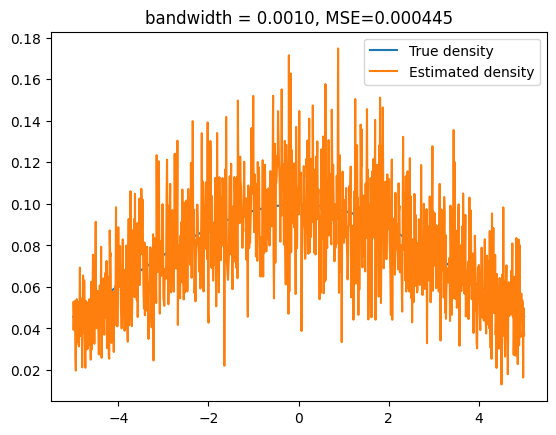

KDE with bandwidth=0.0536 and kernel=gaussian:
MSE error: 0.000008, total log-likelihood: -2565.744617


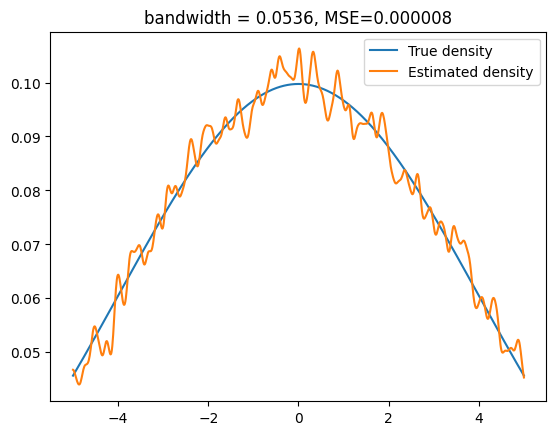

KDE with bandwidth=0.1062 and kernel=gaussian:
MSE error: 0.000004, total log-likelihood: -2565.577683


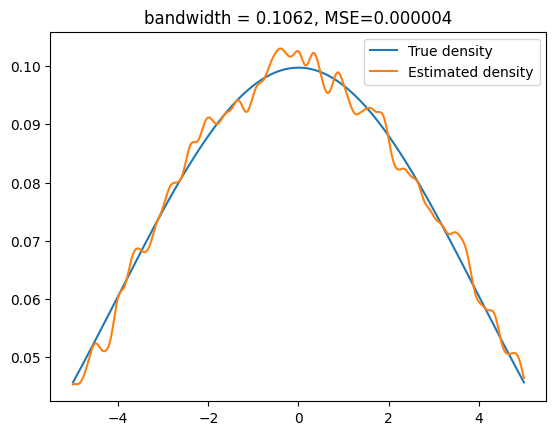

KDE with bandwidth=0.1587 and kernel=gaussian:
MSE error: 0.000003, total log-likelihood: -2565.750666


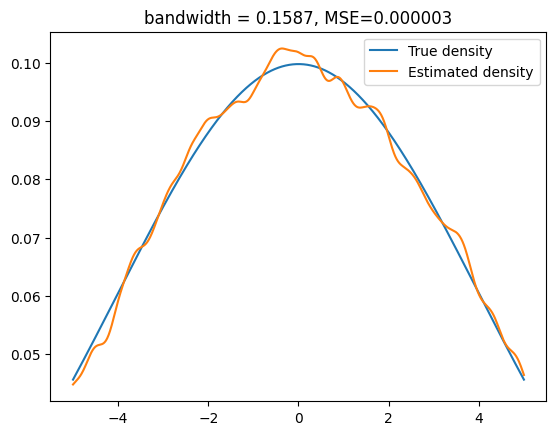

KDE with bandwidth=0.2113 and kernel=gaussian:
MSE error: 0.000002, total log-likelihood: -2566.028691


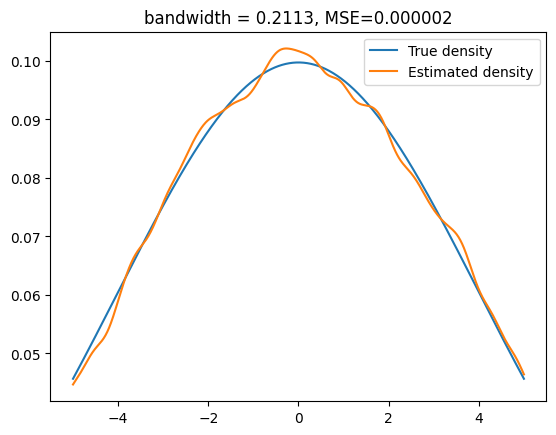

KDE with bandwidth=0.2639 and kernel=gaussian:
MSE error: 0.000002, total log-likelihood: -2566.380545


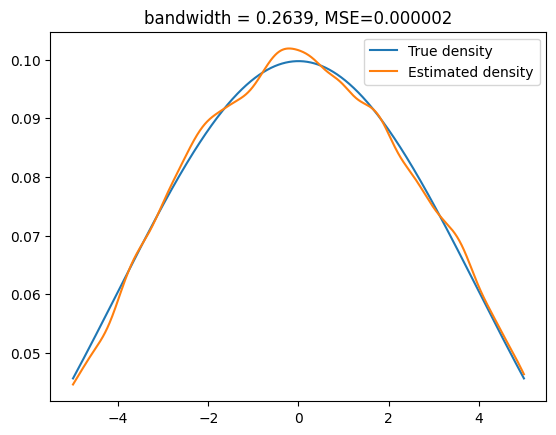

KDE with bandwidth=0.3165 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2566.803995


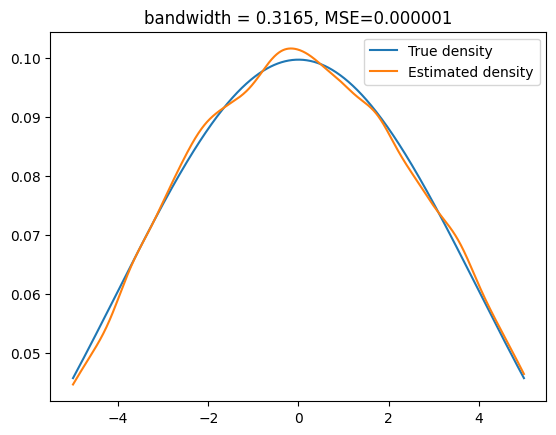

KDE with bandwidth=0.3691 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2567.300211


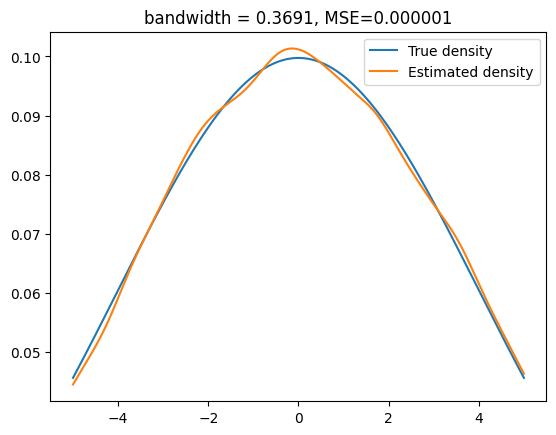

KDE with bandwidth=0.4216 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2567.873835


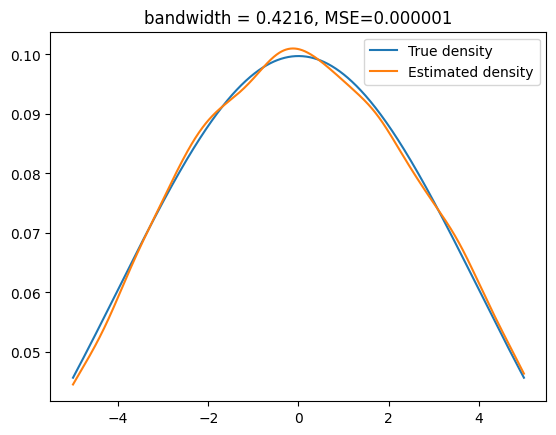

KDE with bandwidth=0.4742 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2568.531017


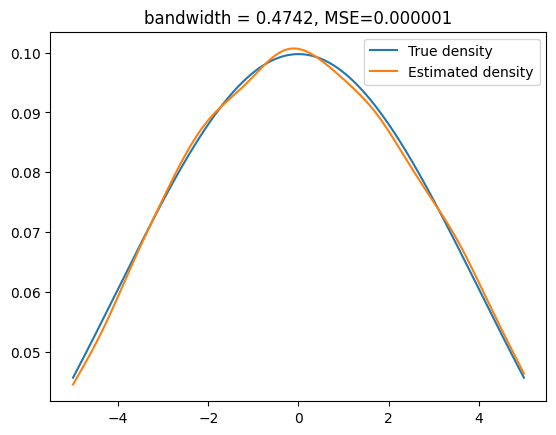

KDE with bandwidth=0.5268 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2569.276928


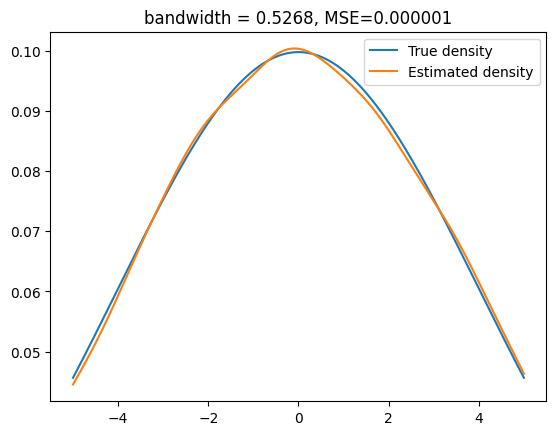

KDE with bandwidth=0.5794 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2570.114594


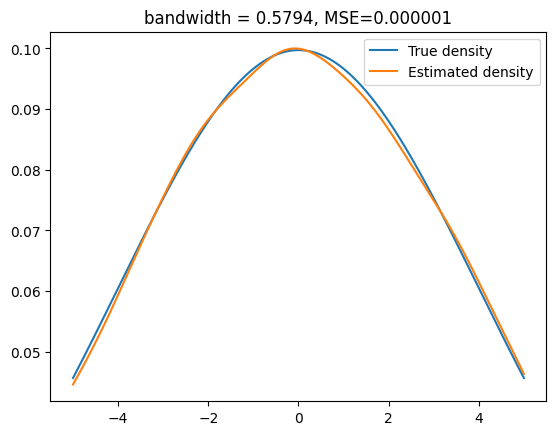

KDE with bandwidth=0.6319 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2571.044962


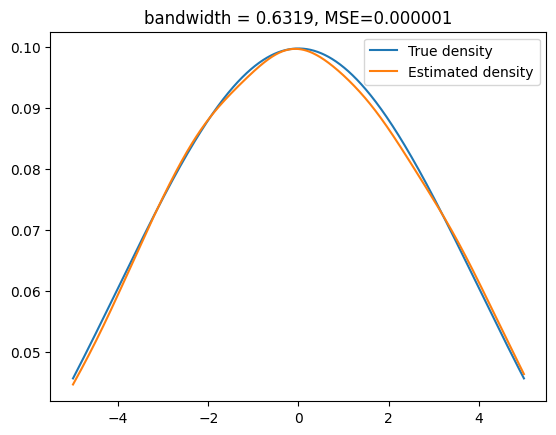

KDE with bandwidth=0.6845 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2572.067537


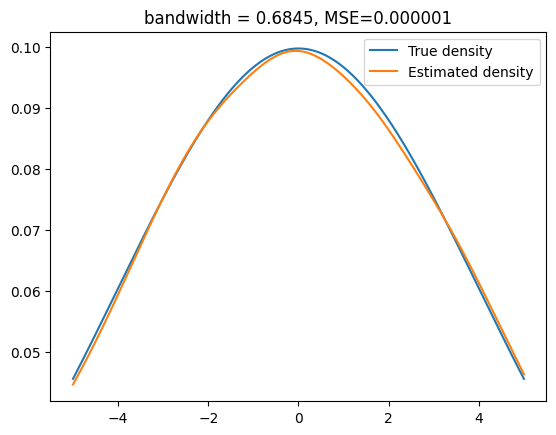

KDE with bandwidth=0.7371 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2573.181047


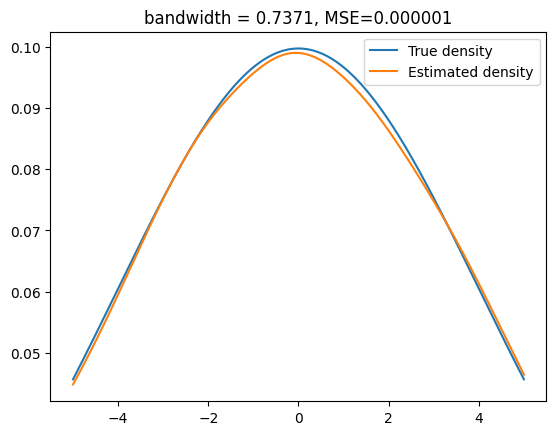

KDE with bandwidth=0.7897 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2574.383927


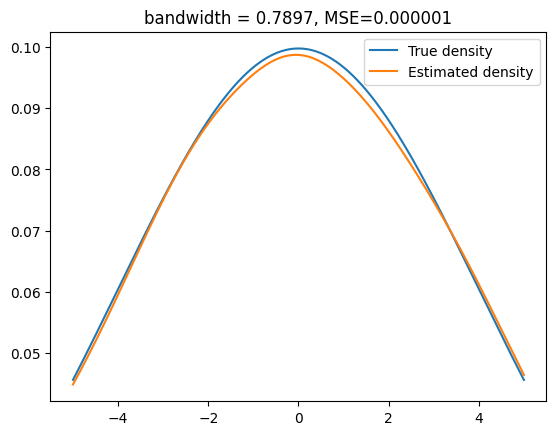

KDE with bandwidth=0.8423 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2575.674606


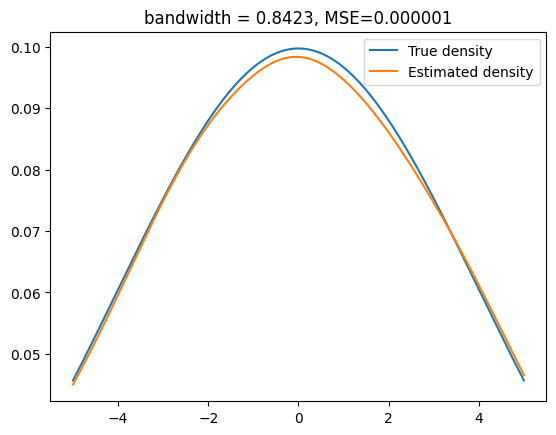

KDE with bandwidth=0.8948 and kernel=gaussian:
MSE error: 0.000002, total log-likelihood: -2577.051649


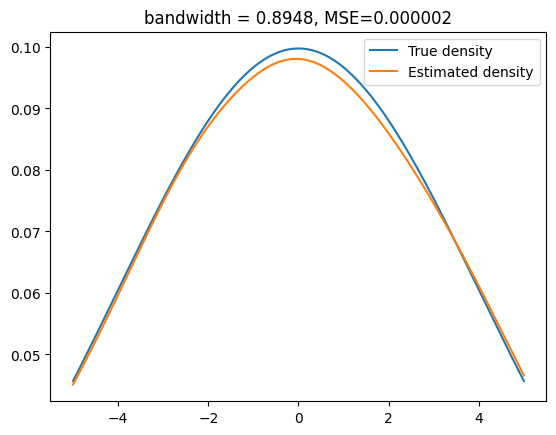

KDE with bandwidth=0.9474 and kernel=gaussian:
MSE error: 0.000002, total log-likelihood: -2578.513799


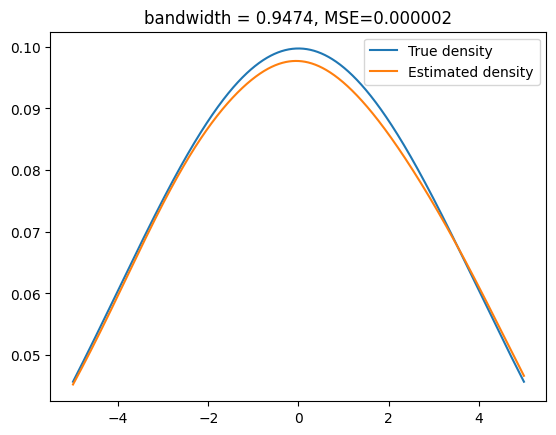

KDE with bandwidth=1.0000 and kernel=gaussian:
MSE error: 0.000003, total log-likelihood: -2580.059976


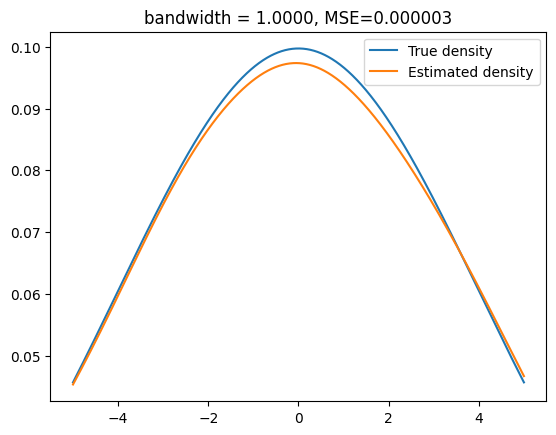

KDE with bandwidth=scott and kernel=gaussian:
MSE error: 0.000004, total log-likelihood: -2565.594705


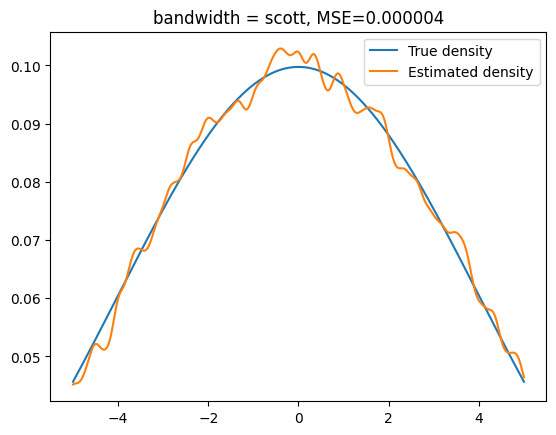

KDE with bandwidth=silverman and kernel=gaussian:
MSE error: 0.000003, total log-likelihood: -2565.612042


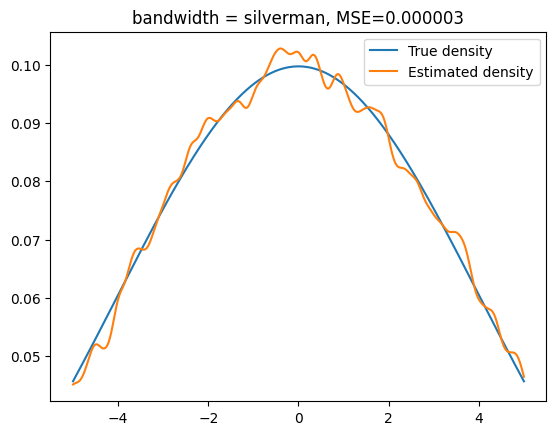

grid search bw = 0.556
KDE with bandwidth=0.5560 and kernel=gaussian:
MSE error: 0.000001, total log-likelihood: -2569.730868


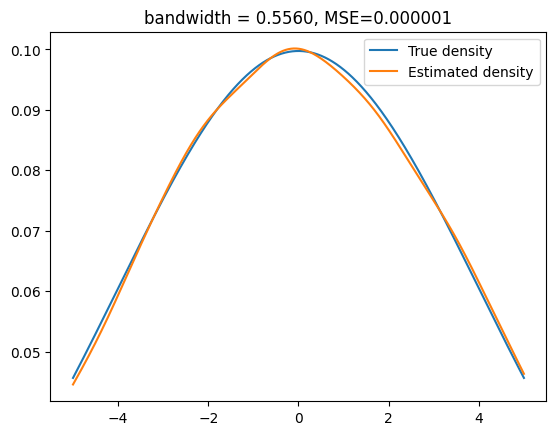

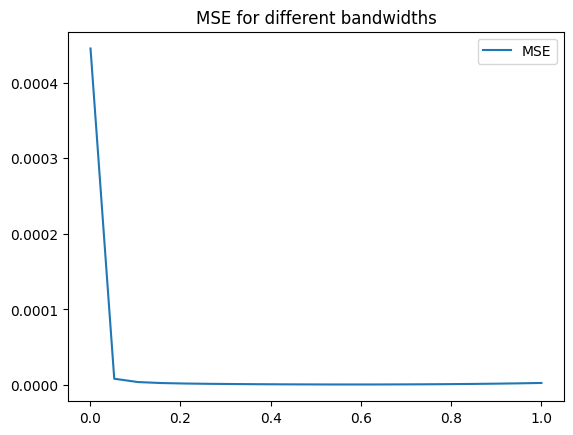

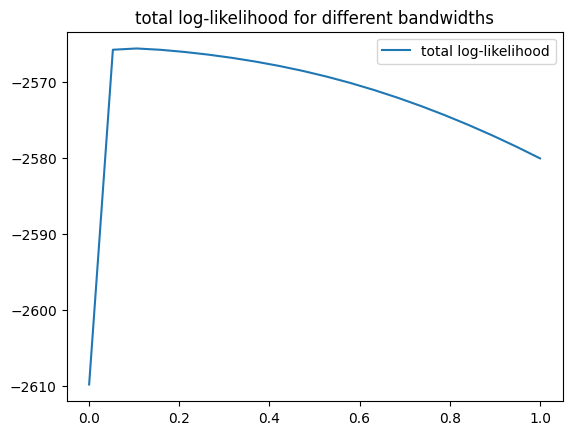

Histogram baseline: MSE error = 0.000480, total log-likelihood: -2330.0205


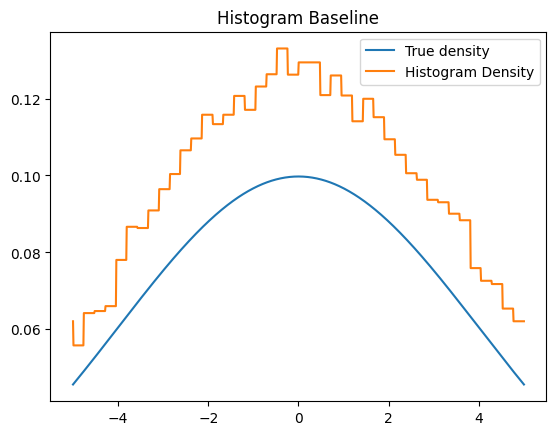

In [9]:
# generate values from normal distribution with std=4
std = 4.0
x_values = np.random.normal(loc=0, scale=std, size=50000).reshape(-1, 1)
x_plot = np.linspace(-5, 5, 1000)[:, np.newaxis]

# Compute the actual probabilities using the normal distribution
true_dens = norm.pdf(x_plot, scale=std)
mse_results = []
total_log_likelihood_results = []

for bw in bandwidths:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=bw, kernel='gaussian')
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

# scott and silverman
mse_scott = kde_fit(x_values, true_dens, x_plot, bandwidth='scott', kernel='gaussian')
mse_silverman = kde_fit(x_values, true_dens, x_plot, bandwidth='silverman', kernel='gaussian')

# grid search
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': np.linspace(0.001, 1.0, 10)},
                    cv=5) # 5-fold cross-validation

grid_search_bw = 0.556 # pre-computed value (uncomment to run gridSearchCV)
# grid.fit(x_values)
# grid_search_bw = grid.best_params_["bandwidth"]
print(f'grid search bw = {grid_search_bw}')
kde_fit(x_values, true_dens, x_plot, bandwidth=grid_search_bw, kernel='gaussian')

plt.plot(bandwidths, mse_results, label='MSE')
plt.title('MSE for different bandwidths')
plt.legend()
plt.show()

plt.plot(bandwidths, total_log_likelihood_results, label='total log-likelihood')
plt.title('total log-likelihood for different bandwidths')
plt.legend()
plt.show()

# compare to histogram baseline
hist, bins = np.histogram(x_values.flatten(), bins='auto', density=True, range=(-5, 5))
bin_indices = [np.searchsorted(bins, value) for value in x_plot.flatten()]
bins_width = bins[1] - bins[0]
hist_estimated_dens = np.array([hist[index - 1] for index in bin_indices])
hist_estimated_dens_without_zeros = hist_estimated_dens.copy()
hist_estimated_dens_without_zeros[hist_estimated_dens_without_zeros == 0] = 0.00001
hist_total_log_likelihood = np.sum(np.log(hist_estimated_dens_without_zeros))
hist_mse_error = np.mean((hist_estimated_dens - true_dens.flatten()) ** 2)
print(f'Histogram baseline: MSE error = {hist_mse_error:.6f}, total log-likelihood: {hist_total_log_likelihood:.4f}')

plt.plot(x_plot, true_dens.flatten(), label='True density')
plt.plot(x_plot, hist_estimated_dens, label='Histogram Density')
plt.title(f'Histogram Baseline')
plt.legend()
plt.show()



KDE with bandwidth=0.0010 and kernel=gaussian:
MSE error: 0.001182, total log-likelihood: -2697.546841


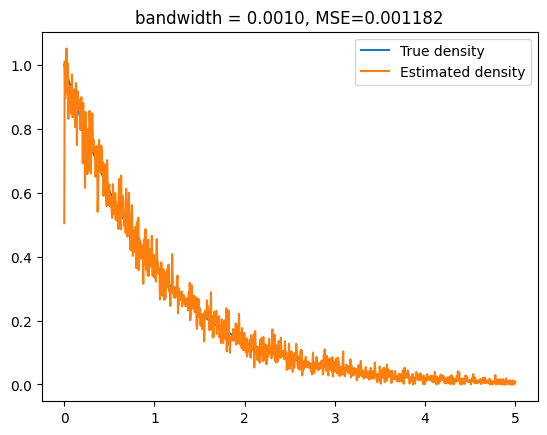

KDE with bandwidth=0.0536 and kernel=gaussian:
MSE error: 0.001630, total log-likelihood: -2506.314075


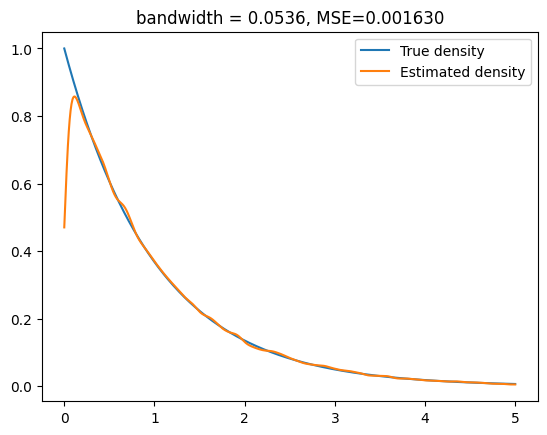

KDE with bandwidth=0.1062 and kernel=gaussian:
MSE error: 0.003165, total log-likelihood: -2506.904125


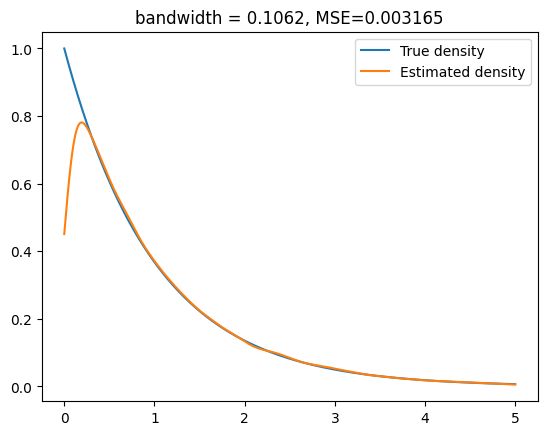

KDE with bandwidth=0.1587 and kernel=gaussian:
MSE error: 0.004744, total log-likelihood: -2506.320133


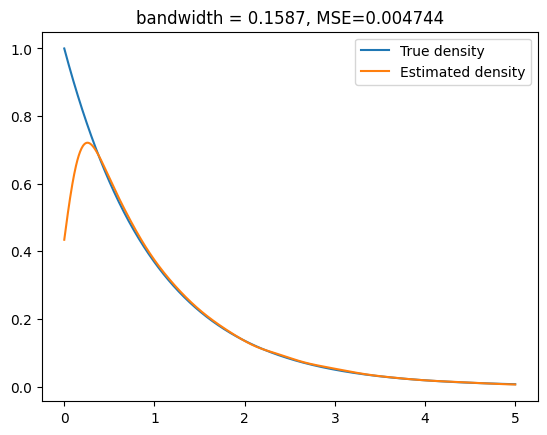

KDE with bandwidth=0.2113 and kernel=gaussian:
MSE error: 0.006364, total log-likelihood: -2504.099640


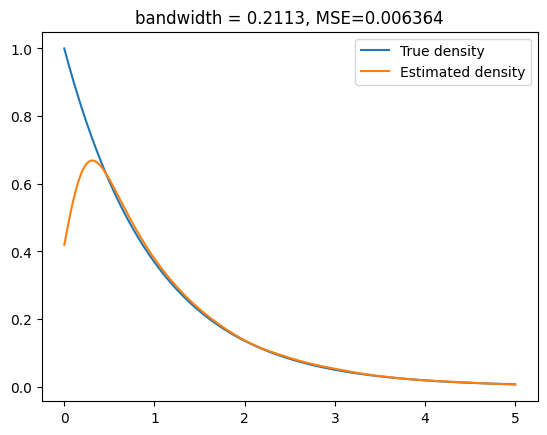

KDE with bandwidth=0.2639 and kernel=gaussian:
MSE error: 0.008024, total log-likelihood: -2500.355586


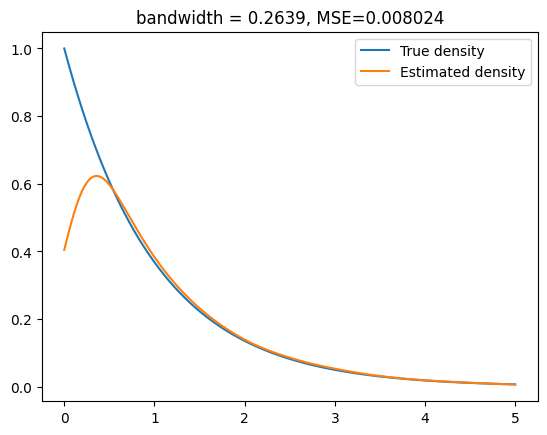

KDE with bandwidth=0.3165 and kernel=gaussian:
MSE error: 0.009716, total log-likelihood: -2495.144665


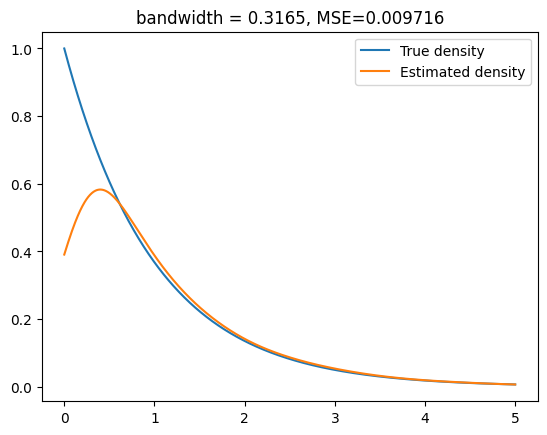

KDE with bandwidth=0.3691 and kernel=gaussian:
MSE error: 0.011428, total log-likelihood: -2488.510193


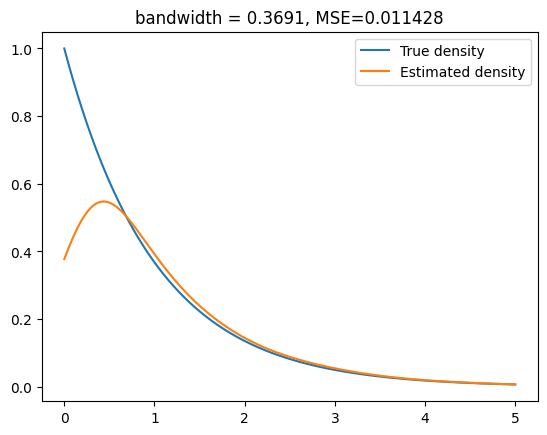

KDE with bandwidth=0.4216 and kernel=gaussian:
MSE error: 0.013148, total log-likelihood: -2480.515614


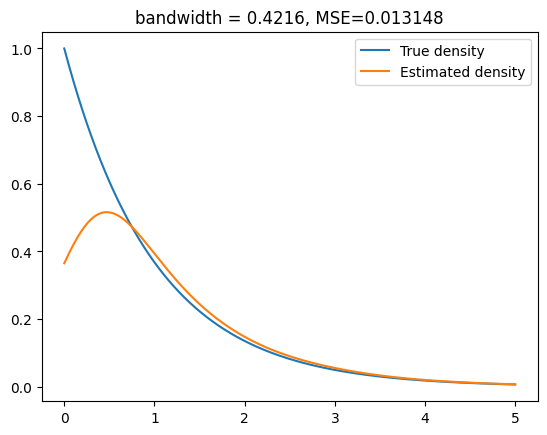

KDE with bandwidth=0.4742 and kernel=gaussian:
MSE error: 0.014867, total log-likelihood: -2471.246964


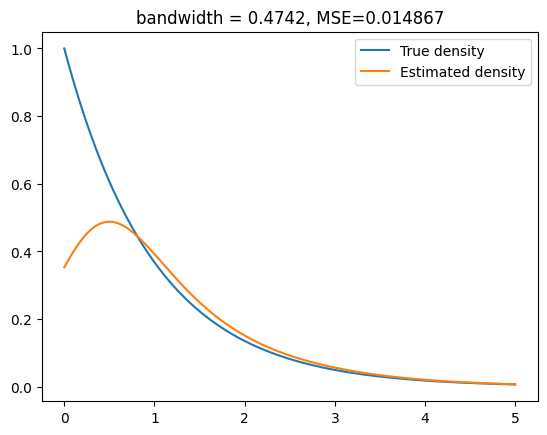

KDE with bandwidth=0.5268 and kernel=gaussian:
MSE error: 0.016577, total log-likelihood: -2460.806025


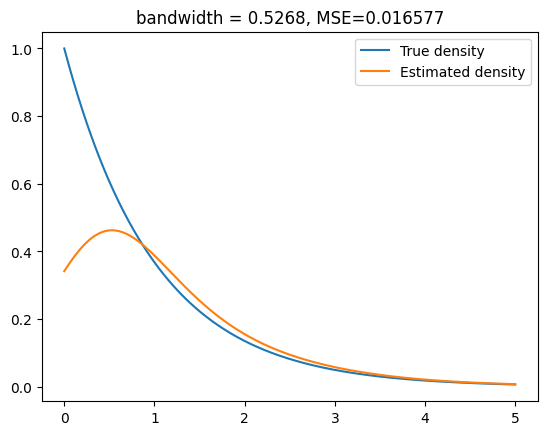

KDE with bandwidth=0.5794 and kernel=gaussian:
MSE error: 0.018269, total log-likelihood: -2449.304461


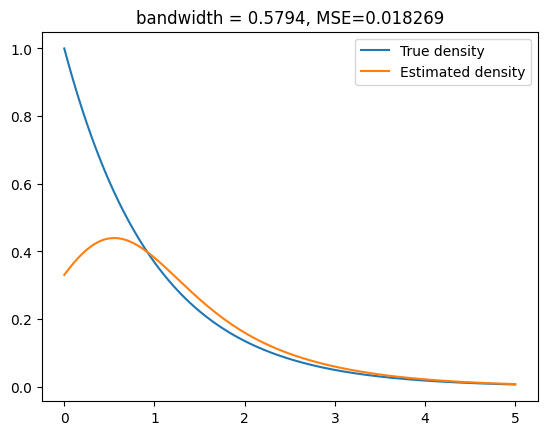

KDE with bandwidth=0.6319 and kernel=gaussian:
MSE error: 0.019940, total log-likelihood: -2436.860257


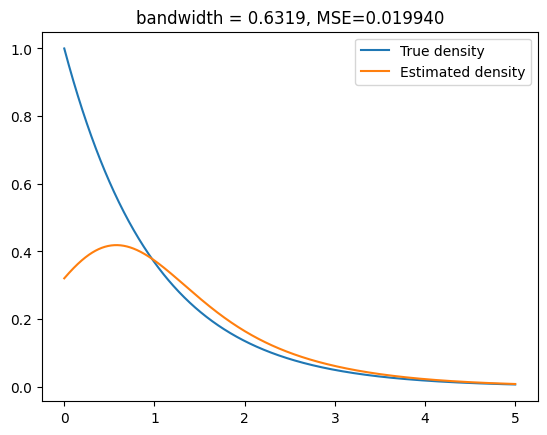

KDE with bandwidth=0.6845 and kernel=gaussian:
MSE error: 0.021584, total log-likelihood: -2423.595662


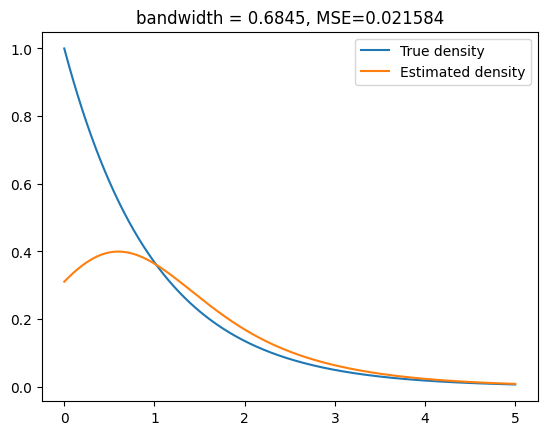

KDE with bandwidth=0.7371 and kernel=gaussian:
MSE error: 0.023198, total log-likelihood: -2409.636078


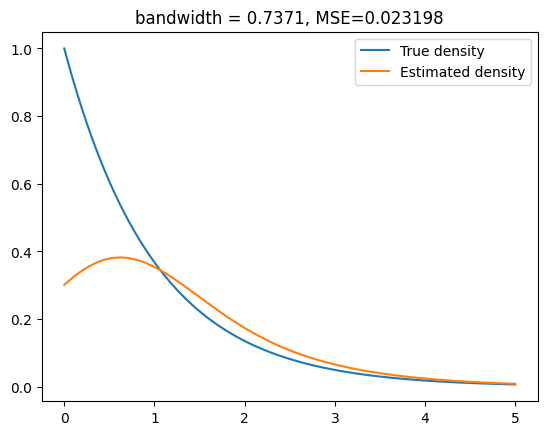

KDE with bandwidth=0.7897 and kernel=gaussian:
MSE error: 0.024779, total log-likelihood: -2395.109674


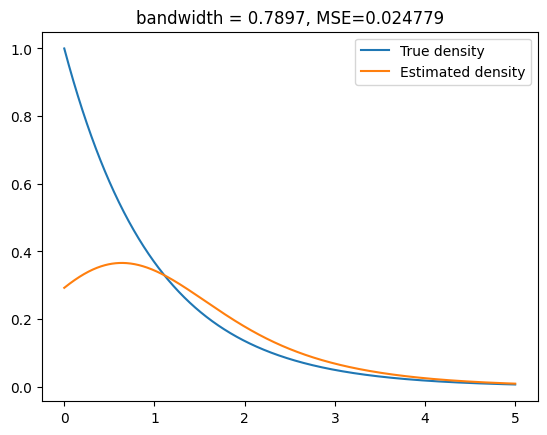

KDE with bandwidth=0.8423 and kernel=gaussian:
MSE error: 0.026325, total log-likelihood: -2380.147519


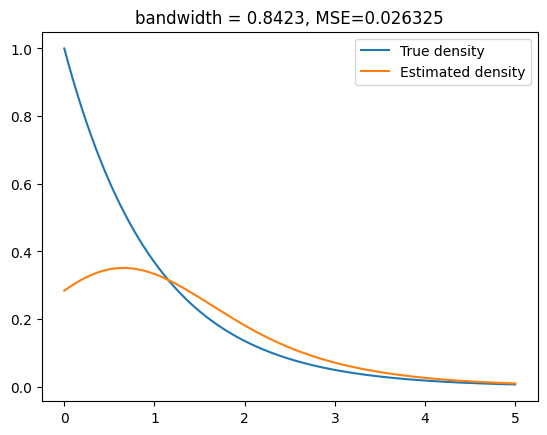

KDE with bandwidth=0.8948 and kernel=gaussian:
MSE error: 0.027835, total log-likelihood: -2364.884038


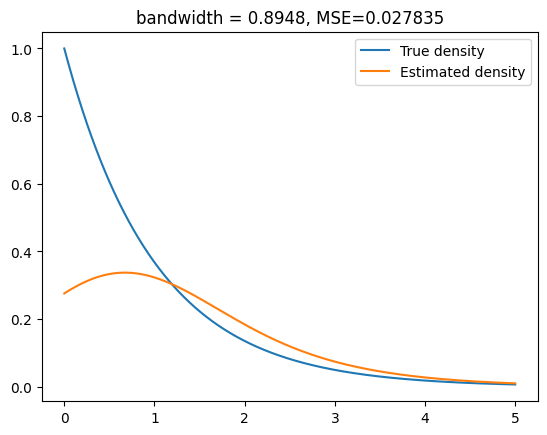

KDE with bandwidth=0.9474 and kernel=gaussian:
MSE error: 0.029308, total log-likelihood: -2349.457537


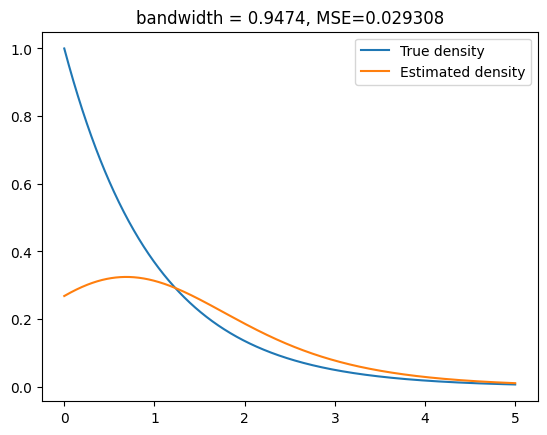

KDE with bandwidth=1.0000 and kernel=gaussian:
MSE error: 0.030742, total log-likelihood: -2334.010489


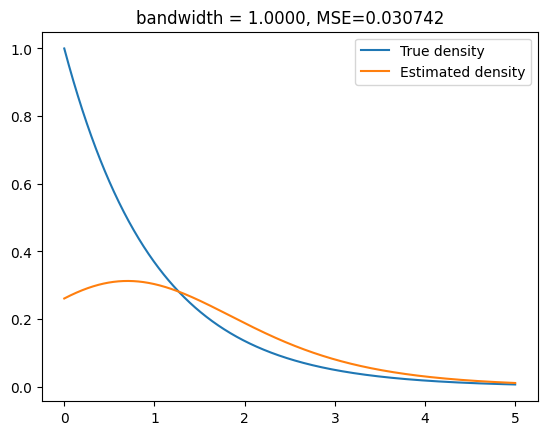

KDE with bandwidth=scott and kernel=gaussian:
MSE error: 0.003425, total log-likelihood: -2506.922912


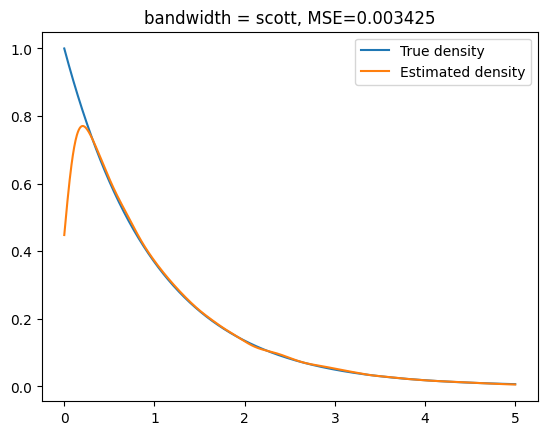

KDE with bandwidth=silverman and kernel=gaussian:
MSE error: 0.003628, total log-likelihood: -2506.906611


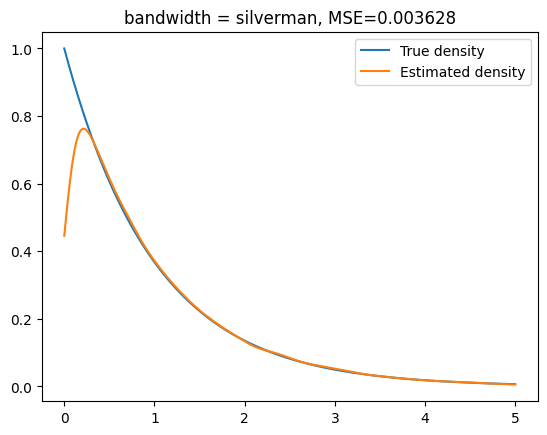

grid search bw = 0.112
KDE with bandwidth=0.1120 and kernel=gaussian:
MSE error: 0.003339, total log-likelihood: -2506.921530


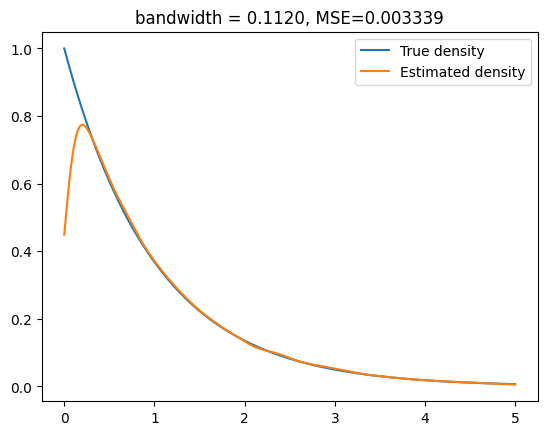

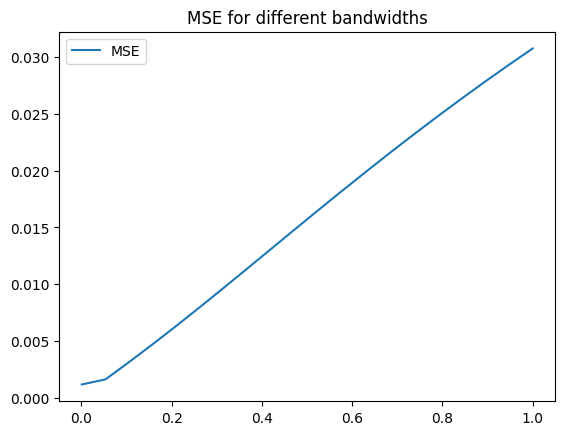

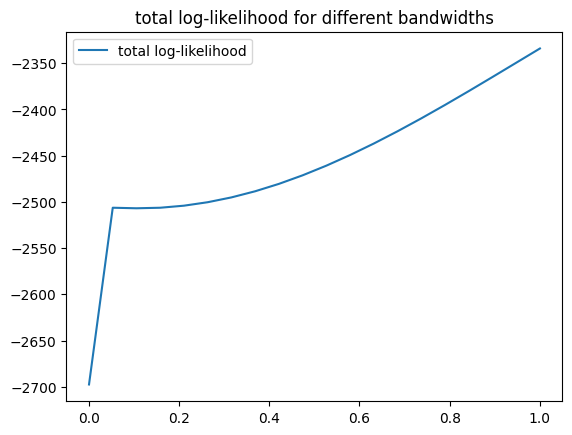

Histogram baseline: MSE error = 0.001093, total log-likelihood: -2504.6239


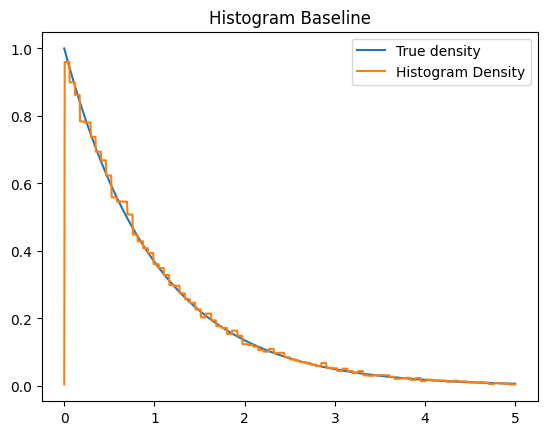

In [10]:
# generate values from exponential distribution
x_values = np.random.exponential(scale=1.0, size=50000).reshape(-1, 1)
x_plot = np.linspace(0, 5, 1000)[:, np.newaxis]

# Compute the actual probabilities using the normal exponential
true_dens = expon.pdf(x_plot, scale=1.0)
mse_results = []
total_log_likelihood_results = []

for bw in bandwidths:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=bw, kernel='gaussian')
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)


# scott and silverman
mse_scott = kde_fit(x_values, true_dens, x_plot, bandwidth='scott', kernel='gaussian')
mse_silverman = kde_fit(x_values, true_dens, x_plot, bandwidth='silverman', kernel='gaussian')

# grid search
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': np.linspace(0.001, 1.0, 10)},
                    cv=5) # 5-fold cross-validation

grid_search_bw = 0.112 # pre-computed value (uncomment to run gridSearchCV)
# grid.fit(x_values)
# grid_search_bw = grid.best_params_["bandwidth"]
print(f'grid search bw = {grid_search_bw}')
kde_fit(x_values, true_dens, x_plot, bandwidth=grid_search_bw, kernel='gaussian')

plt.plot(bandwidths, mse_results, label='MSE')
plt.title('MSE for different bandwidths')
plt.legend()
plt.show()

plt.plot(bandwidths, total_log_likelihood_results, label='total log-likelihood')
plt.title('total log-likelihood for different bandwidths')
plt.legend()
plt.show()

# compare to histogram baseline
hist, bins = np.histogram(x_values.flatten(), bins='auto', density=True, range=(0, 5))
bin_indices = [np.searchsorted(bins, value) for value in x_plot.flatten()]
bins_width = bins[1] - bins[0]
hist_estimated_dens = np.array([hist[index - 1] for index in bin_indices])
hist_estimated_dens_without_zeros = hist_estimated_dens.copy()
hist_estimated_dens_without_zeros[hist_estimated_dens_without_zeros == 0] = 0.00001
hist_total_log_likelihood = np.sum(np.log(hist_estimated_dens_without_zeros))
hist_mse_error = np.mean((hist_estimated_dens - true_dens.flatten()) ** 2)
print(f'Histogram baseline: MSE error = {hist_mse_error:.6f}, total log-likelihood: {hist_total_log_likelihood:.4f}')

plt.plot(x_plot, true_dens.flatten(), label='True density')
plt.plot(x_plot, hist_estimated_dens, label='Histogram Density')
plt.title(f'Histogram Baseline')
plt.legend()
plt.show()


KDE with bandwidth=0.0010 and kernel=gaussian:
MSE error: 0.000531, total log-likelihood: -5108.159897


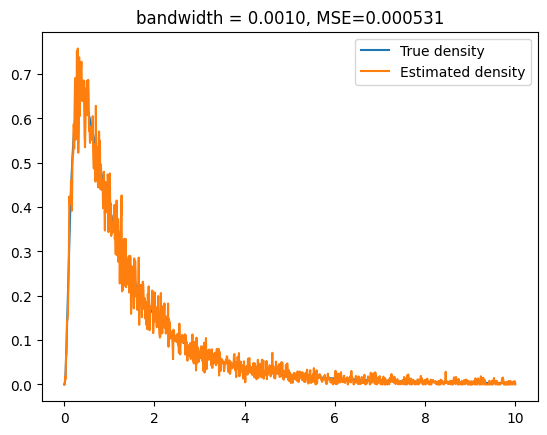

KDE with bandwidth=0.0536 and kernel=gaussian:
MSE error: 0.000036, total log-likelihood: -3564.405496


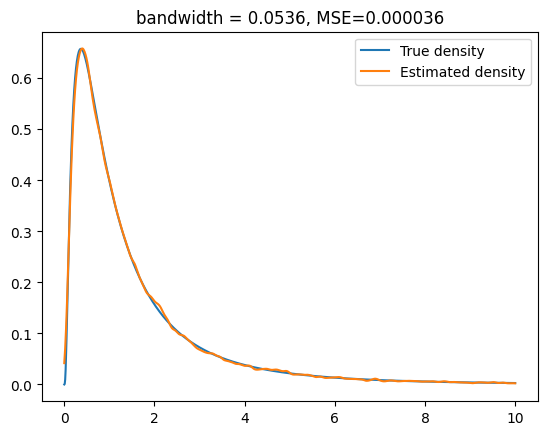

KDE with bandwidth=0.1062 and kernel=gaussian:
MSE error: 0.000178, total log-likelihood: -3558.038834


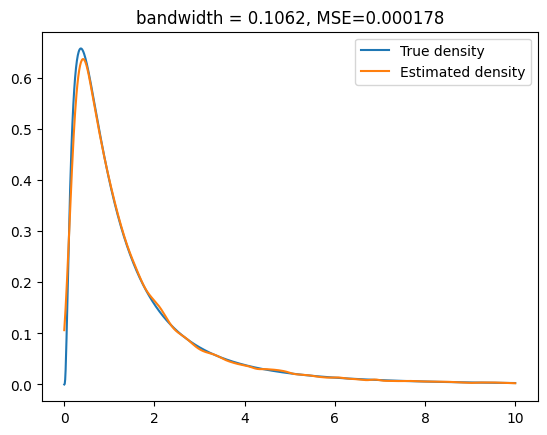

KDE with bandwidth=0.1587 and kernel=gaussian:
MSE error: 0.000434, total log-likelihood: -3554.807517


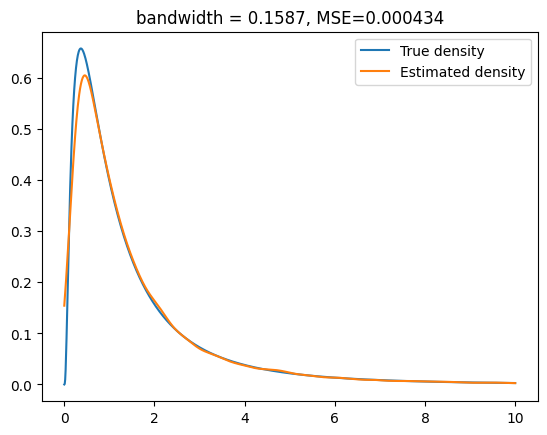

KDE with bandwidth=0.2113 and kernel=gaussian:
MSE error: 0.000782, total log-likelihood: -3552.373462


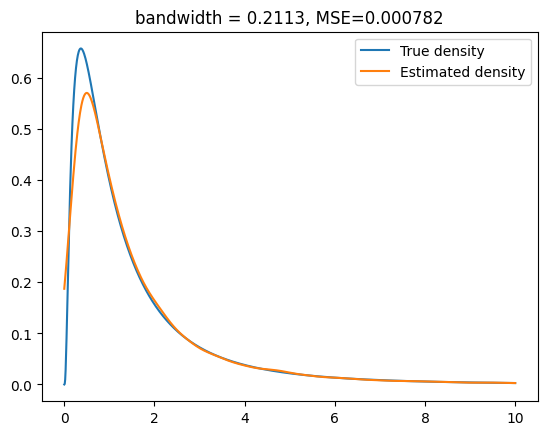

KDE with bandwidth=0.2639 and kernel=gaussian:
MSE error: 0.001196, total log-likelihood: -3550.183691


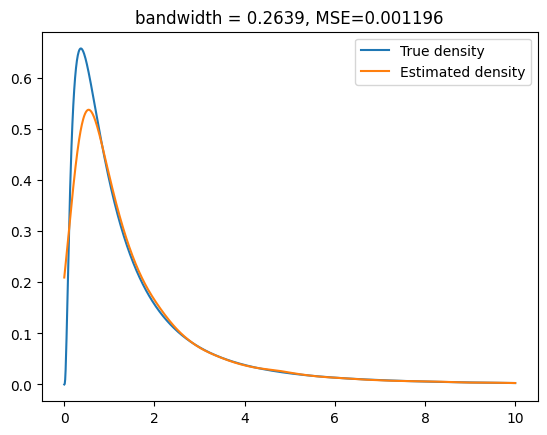

KDE with bandwidth=0.3165 and kernel=gaussian:
MSE error: 0.001657, total log-likelihood: -3547.889460


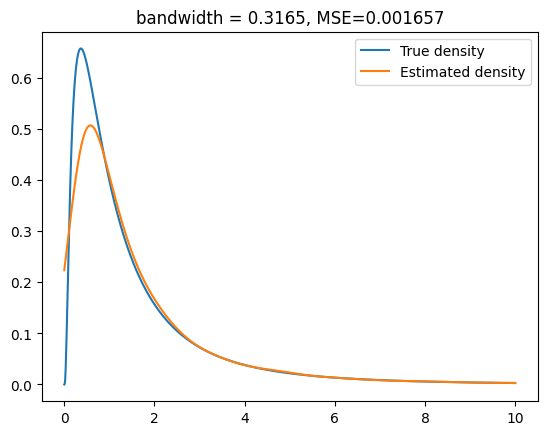

KDE with bandwidth=0.3691 and kernel=gaussian:
MSE error: 0.002150, total log-likelihood: -3545.263227


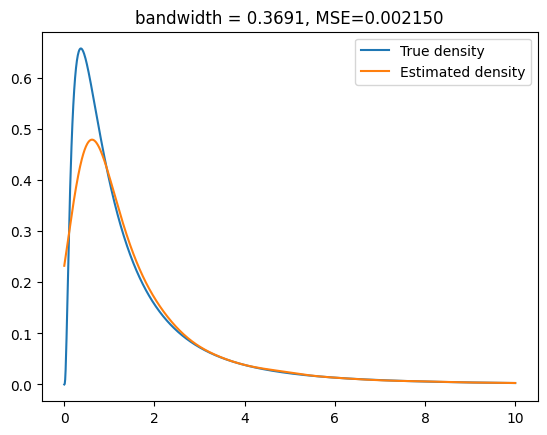

KDE with bandwidth=0.4216 and kernel=gaussian:
MSE error: 0.002666, total log-likelihood: -3542.178016


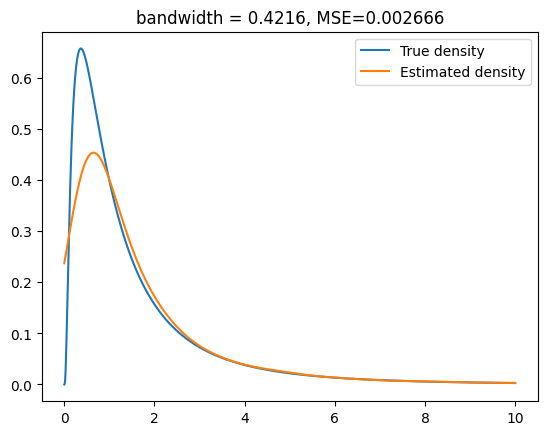

KDE with bandwidth=0.4742 and kernel=gaussian:
MSE error: 0.003196, total log-likelihood: -3538.576078


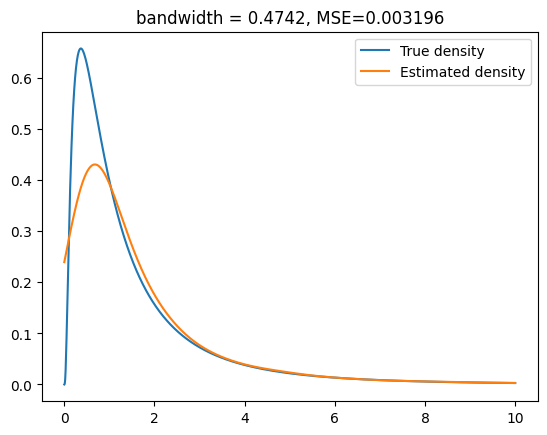

KDE with bandwidth=0.5268 and kernel=gaussian:
MSE error: 0.003734, total log-likelihood: -3534.441891


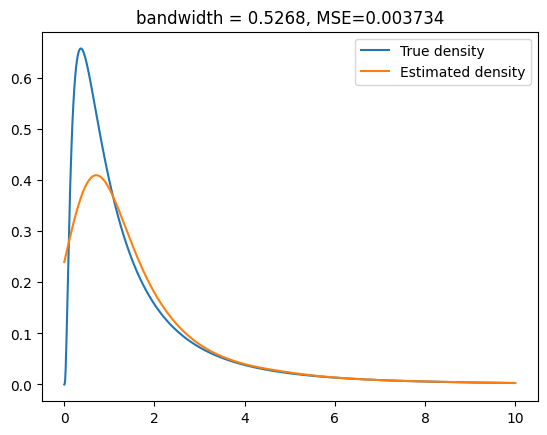

KDE with bandwidth=0.5794 and kernel=gaussian:
MSE error: 0.004274, total log-likelihood: -3529.782321


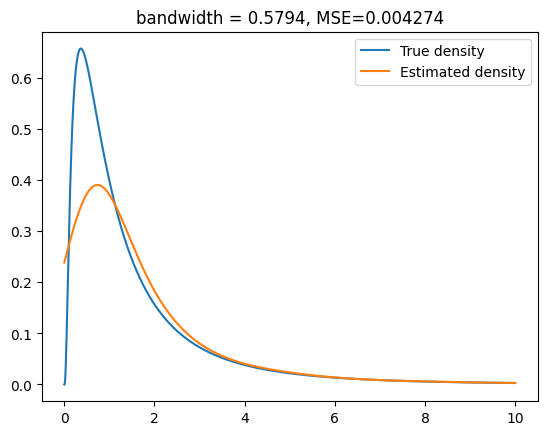

KDE with bandwidth=0.6319 and kernel=gaussian:
MSE error: 0.004814, total log-likelihood: -3524.614107


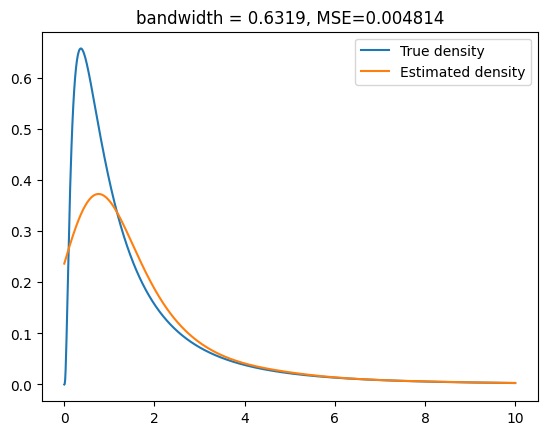

KDE with bandwidth=0.6845 and kernel=gaussian:
MSE error: 0.005351, total log-likelihood: -3518.957093


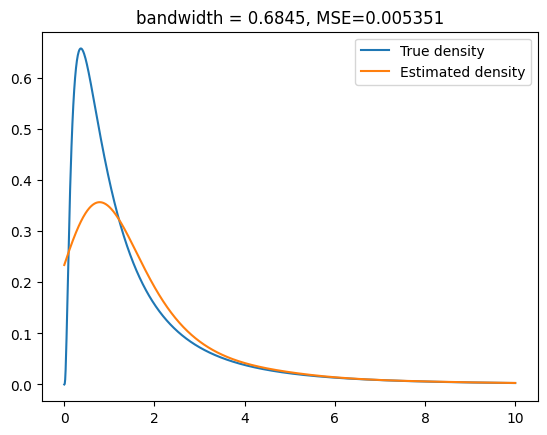

KDE with bandwidth=0.7371 and kernel=gaussian:
MSE error: 0.005882, total log-likelihood: -3512.831083


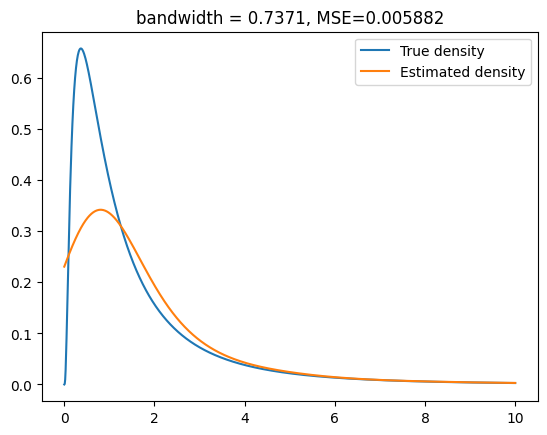

KDE with bandwidth=0.7897 and kernel=gaussian:
MSE error: 0.006406, total log-likelihood: -3506.254652


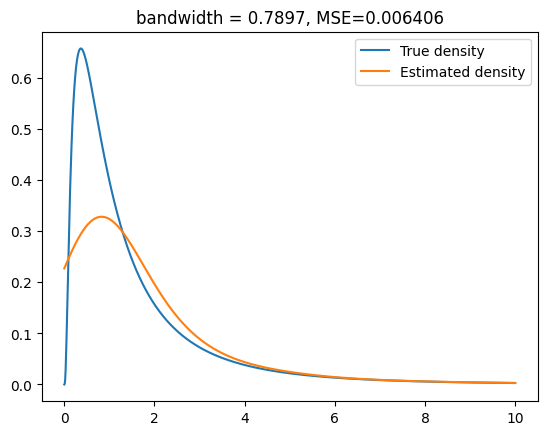

KDE with bandwidth=0.8423 and kernel=gaussian:
MSE error: 0.006921, total log-likelihood: -3499.244878


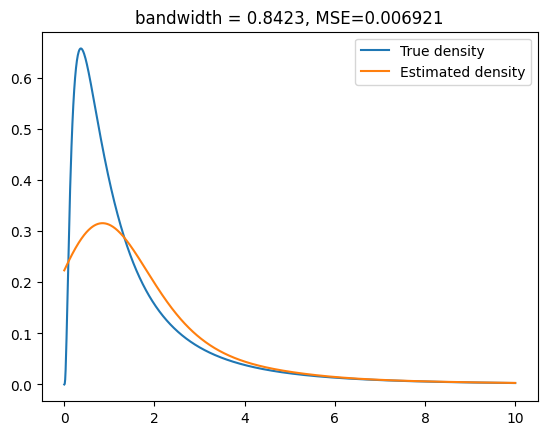

KDE with bandwidth=0.8948 and kernel=gaussian:
MSE error: 0.007427, total log-likelihood: -3491.817496


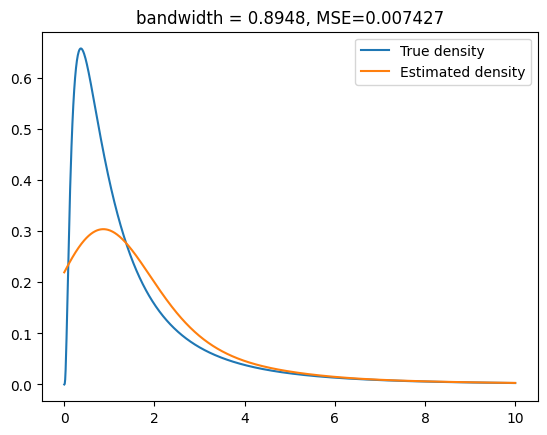

KDE with bandwidth=0.9474 and kernel=gaussian:
MSE error: 0.007924, total log-likelihood: -3483.987188


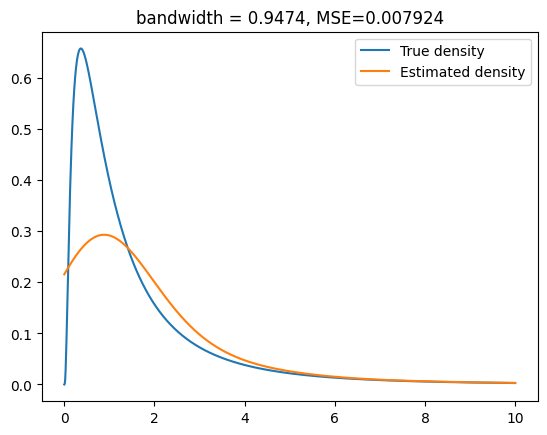

KDE with bandwidth=1.0000 and kernel=gaussian:
MSE error: 0.008410, total log-likelihood: -3475.767917


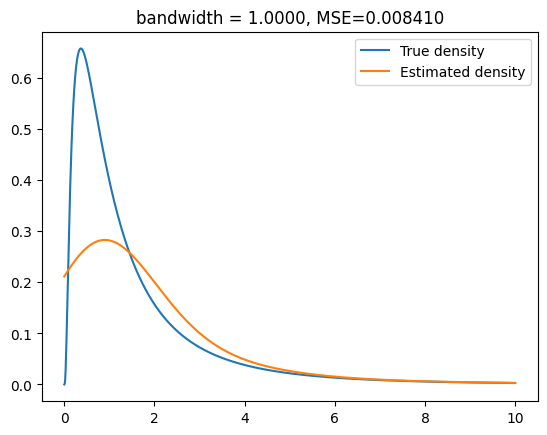

KDE with bandwidth=scott and kernel=gaussian:
MSE error: 0.000213, total log-likelihood: -3557.404238


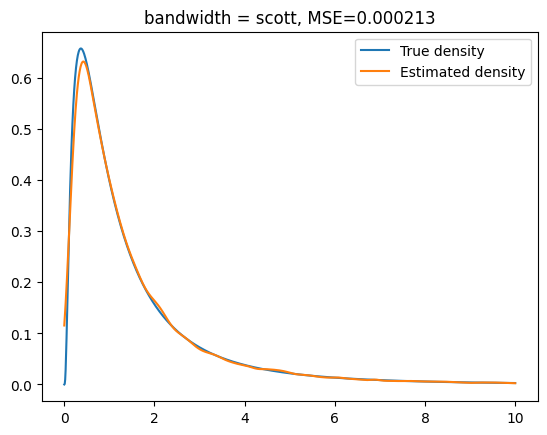

KDE with bandwidth=silverman and kernel=gaussian:
MSE error: 0.000243, total log-likelihood: -3556.944142


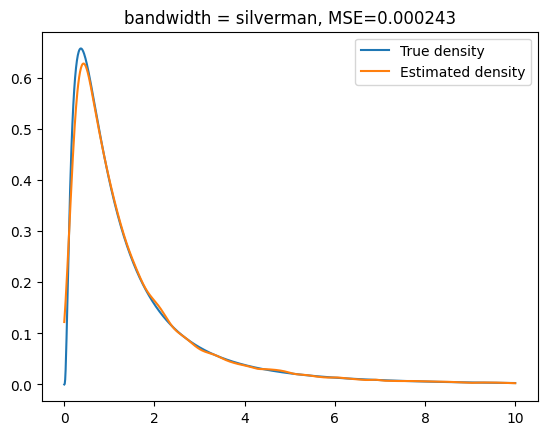

grid search bw = 0.889
KDE with bandwidth=0.8890 and kernel=gaussian:
MSE error: 0.007371, total log-likelihood: -3492.662919


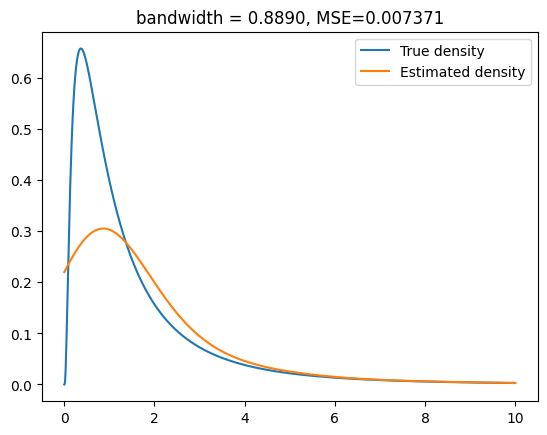

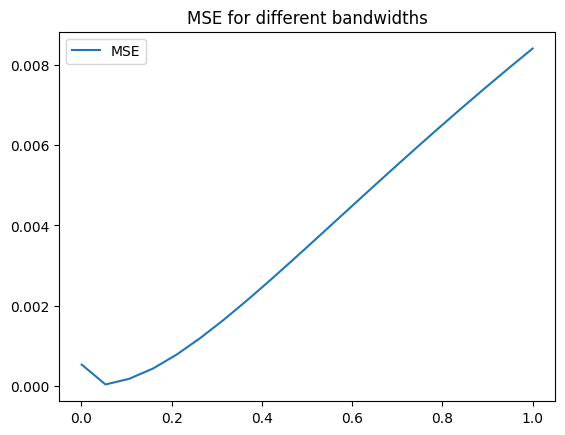

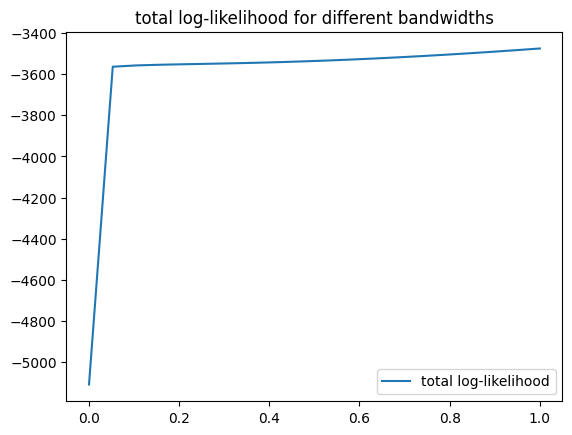

Histogram baseline: MSE error = 0.000120, total log-likelihood: -3565.7799


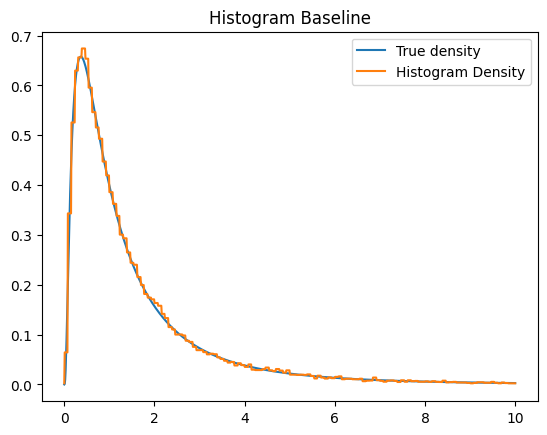

In [11]:
# generate values from lognormal distribution
x_values = np.random.lognormal(size=50000).reshape(-1, 1)
x_plot = np.linspace(0, 10, 1000)[:, np.newaxis]

# Compute the actual probabilities using the lognormal exponential
true_dens = lognorm.pdf(x_plot, s=1.0)
mse_results = []
total_log_likelihood_results = []

for bw in bandwidths:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=bw, kernel='gaussian')
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

# scott and silverman
mse_scott = kde_fit(x_values, true_dens, x_plot, bandwidth='scott', kernel='gaussian')
mse_silverman = kde_fit(x_values, true_dens, x_plot, bandwidth='silverman', kernel='gaussian')

# grid search
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': np.linspace(0.001, 1.0, 10)},
                    cv=5) # 5-fold cross-validation

grid_search_bw = 0.889 # pre-computed value (uncomment to run gridSearchCV)
# grid.fit(x_values)
# grid_search_bw = grid.best_params_["bandwidth"]
print(f'grid search bw = {grid_search_bw}')
kde_fit(x_values, true_dens, x_plot, bandwidth=grid_search_bw, kernel='gaussian')

plt.plot(bandwidths, mse_results, label='MSE')
plt.title('MSE for different bandwidths')
plt.legend()
plt.show()

plt.plot(bandwidths, total_log_likelihood_results, label='total log-likelihood')
plt.title('total log-likelihood for different bandwidths')
plt.legend()
plt.show()

# compare to histogram baseline
hist, bins = np.histogram(x_values.flatten(), bins='auto', density=True, range=(0, 10))
bin_indices = [np.searchsorted(bins, value) for value in x_plot.flatten()]
bins_width = bins[1] - bins[0]
hist_estimated_dens = np.array([hist[index - 1] for index in bin_indices])
hist_estimated_dens_without_zeros = hist_estimated_dens.copy()
hist_estimated_dens_without_zeros[hist_estimated_dens_without_zeros == 0] = 0.00001
hist_total_log_likelihood = np.sum(np.log(hist_estimated_dens_without_zeros))
hist_mse_error = np.mean((hist_estimated_dens - true_dens.flatten()) ** 2)
print(f'Histogram baseline: MSE error = {hist_mse_error:.6f}, total log-likelihood: {hist_total_log_likelihood:.4f}')

plt.plot(x_plot, true_dens.flatten(), label='True density')
plt.plot(x_plot, hist_estimated_dens, label='Histogram Density')
plt.title(f'Histogram Baseline')
plt.legend()
plt.show()

KDE with bandwidth=0.1120 and kernel=gaussian:
MSE error: 0.000003, total log-likelihood: -6619.682696


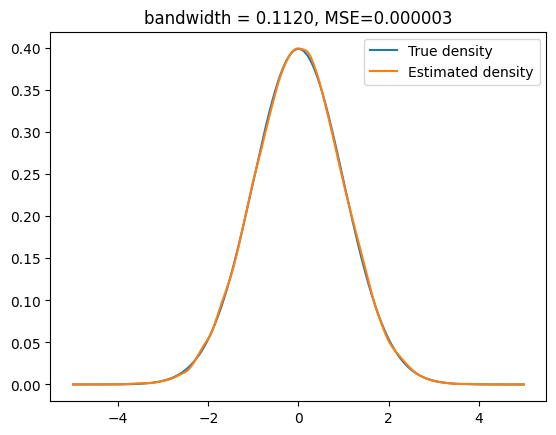

KDE with bandwidth=0.1120 and kernel=tophat:
MSE error: 0.000006, total log-likelihood: -inf


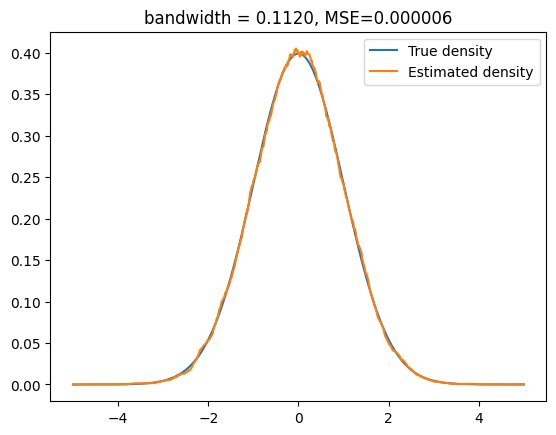

KDE with bandwidth=0.1120 and kernel=epanechnikov:
MSE error: 0.000008, total log-likelihood: -inf


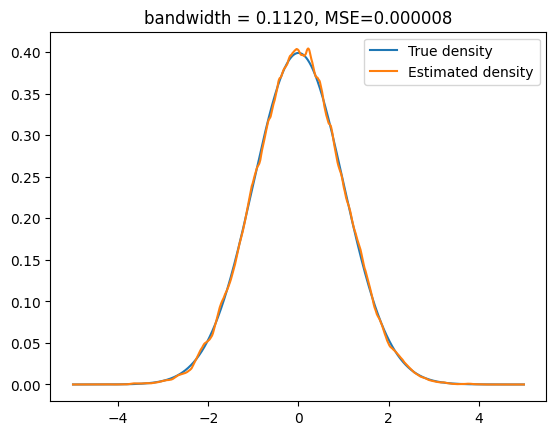

KDE with bandwidth=0.1120 and kernel=exponential:
MSE error: 0.000004, total log-likelihood: -5262.719556


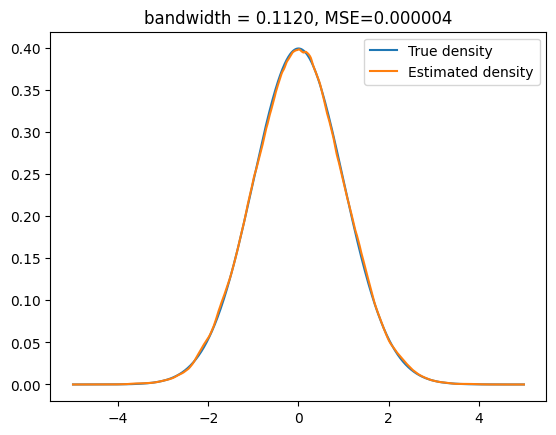

KDE with bandwidth=0.1120 and kernel=linear:
MSE error: 0.000009, total log-likelihood: -inf


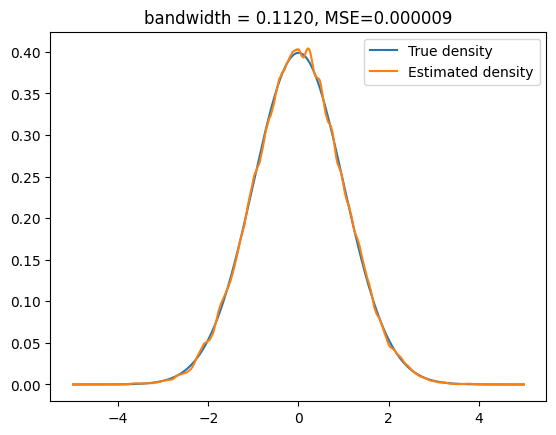

KDE with bandwidth=0.1120 and kernel=cosine:
MSE error: 0.000008, total log-likelihood: -inf


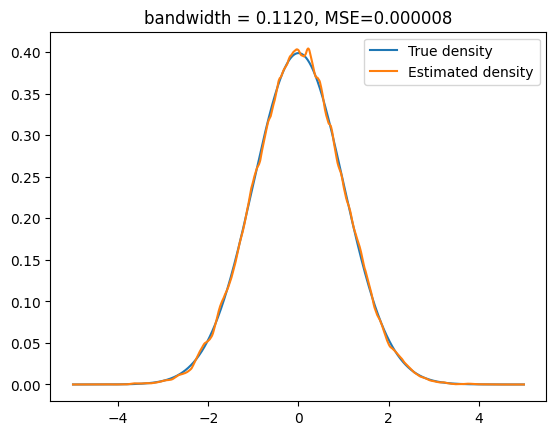

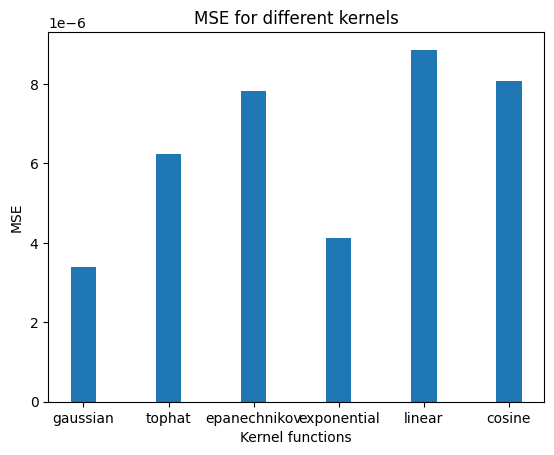

In [12]:
# testing different kenrel functions
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

# testing all kernel functions for normal distribution, with bw = 0.112

# generate values from normal distribution with std=1
std = 1.0
x_values = np.random.normal(loc=0, scale=std, size=50000).reshape(-1, 1)
x_plot = np.linspace(-5, 5, 1000)[:, np.newaxis]

# Compute the actual probabilities using the normal distribution
true_dens = norm.pdf(x_plot, scale=std)
mse_results = []
total_log_likelihood_results = []

for kernel in kernels:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=0.112, kernel=kernel)
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

plt.bar(kernels, mse_results, width = 0.3)
plt.xlabel("Kernel functions")
plt.ylabel("MSE")
plt.title("MSE for different kernels")
plt.show()

KDE with bandwidth=0.5560 and kernel=gaussian:
MSE error: 0.000002, total log-likelihood: -2574.259398


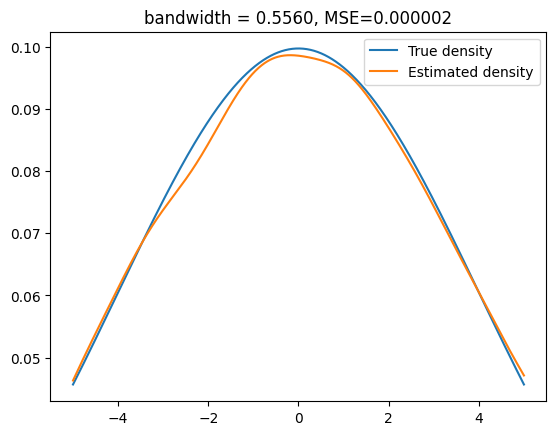

KDE with bandwidth=0.5560 and kernel=tophat:
MSE error: 0.000002, total log-likelihood: -2571.363108


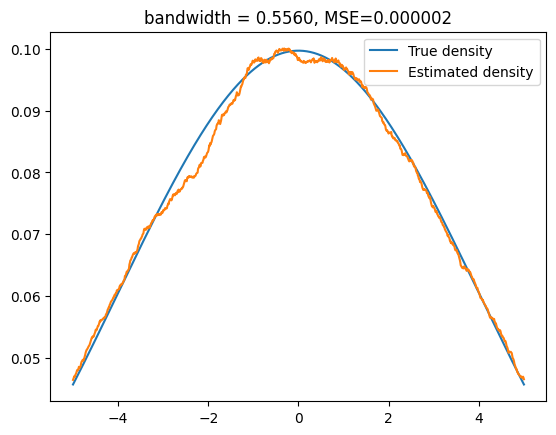

KDE with bandwidth=0.5560 and kernel=epanechnikov:
MSE error: 0.000003, total log-likelihood: -2570.577197


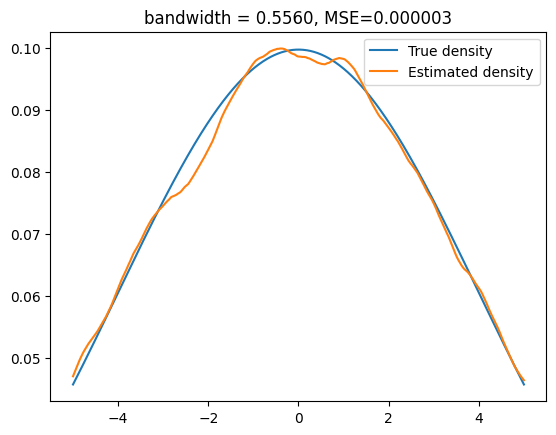

KDE with bandwidth=0.5560 and kernel=exponential:
MSE error: 0.000003, total log-likelihood: -2578.911802


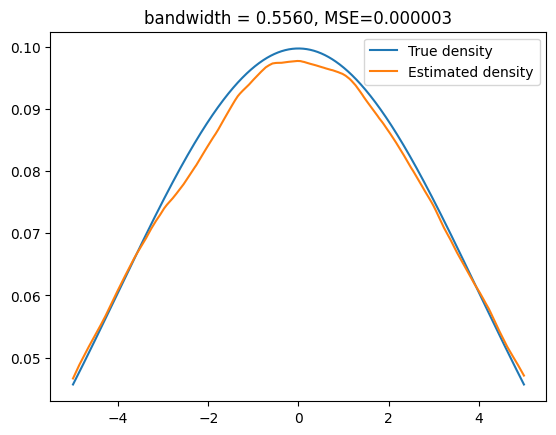

KDE with bandwidth=0.5560 and kernel=linear:
MSE error: 0.000003, total log-likelihood: -2570.327095


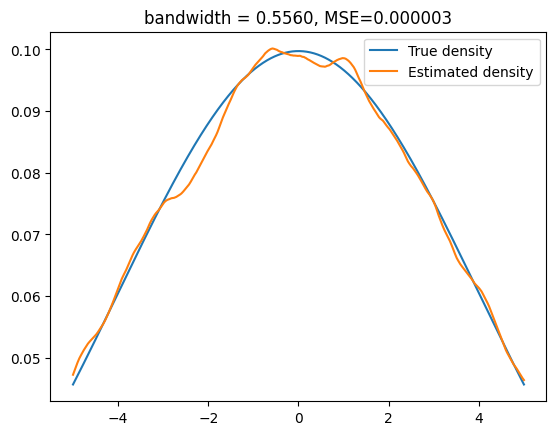

KDE with bandwidth=0.5560 and kernel=cosine:
MSE error: 0.000003, total log-likelihood: -2570.503152


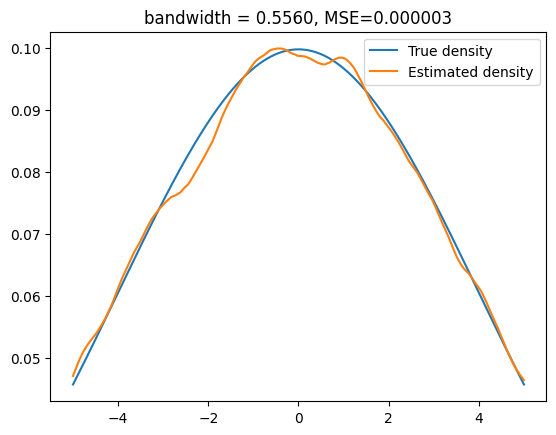

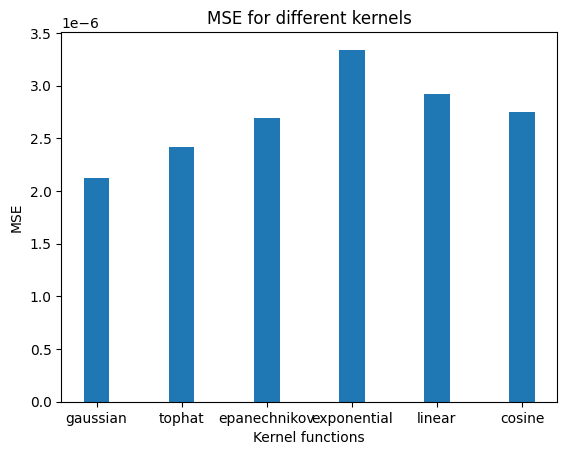

In [13]:
# generate values from normal distribution with std=4
std = 4.0
x_values = np.random.normal(loc=0, scale=std, size=50000).reshape(-1, 1)
x_plot = np.linspace(-5, 5, 1000)[:, np.newaxis]

# Compute the actual probabilities using the normal distribution
true_dens = norm.pdf(x_plot, scale=std)
mse_results = []
total_log_likelihood_results = []

# testing all kernel functions for normal distribution, with bw = 0.556
for kernel in kernels:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=0.556, kernel=kernel)
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

plt.bar(kernels, mse_results, width = 0.3)
plt.xlabel("Kernel functions")
plt.ylabel("MSE")
plt.title("MSE for different kernels")
plt.show()


KDE with bandwidth=0.0535 and kernel=gaussian:
MSE error: 0.001455, total log-likelihood: -2519.313438


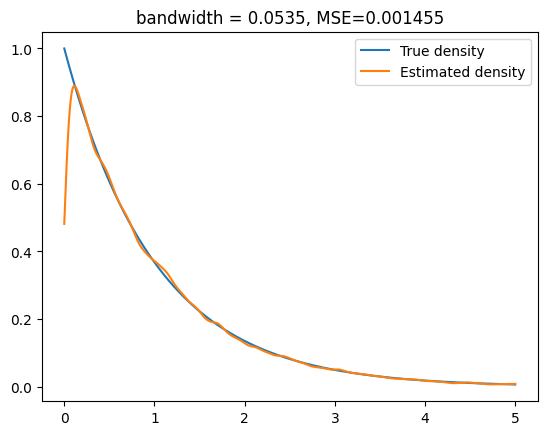

KDE with bandwidth=0.0535 and kernel=tophat:
MSE error: 0.001096, total log-likelihood: -2519.421687


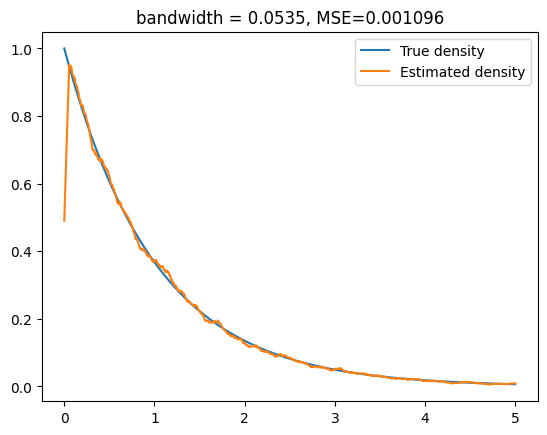

KDE with bandwidth=0.0535 and kernel=epanechnikov:
MSE error: 0.000829, total log-likelihood: -2519.051801


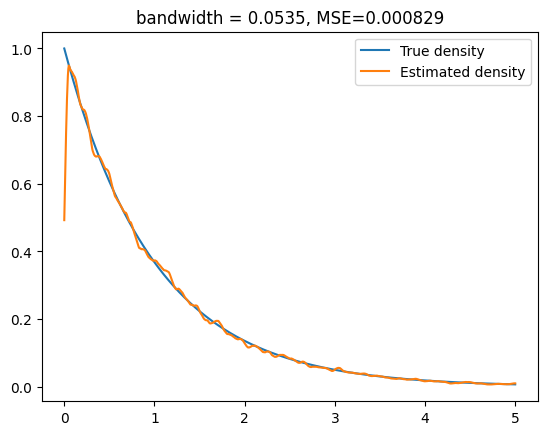

KDE with bandwidth=0.0535 and kernel=exponential:
MSE error: 0.001562, total log-likelihood: -2519.073546


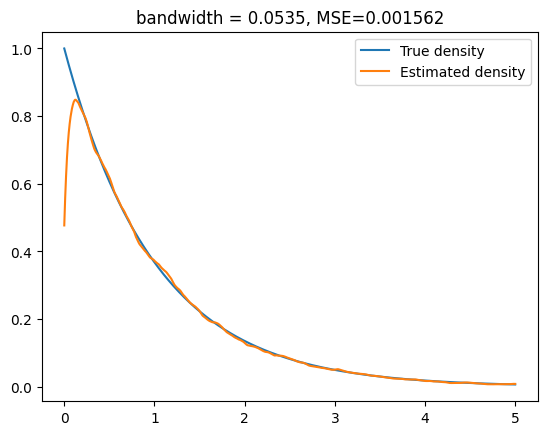

KDE with bandwidth=0.0535 and kernel=linear:
MSE error: 0.000739, total log-likelihood: -2519.099371


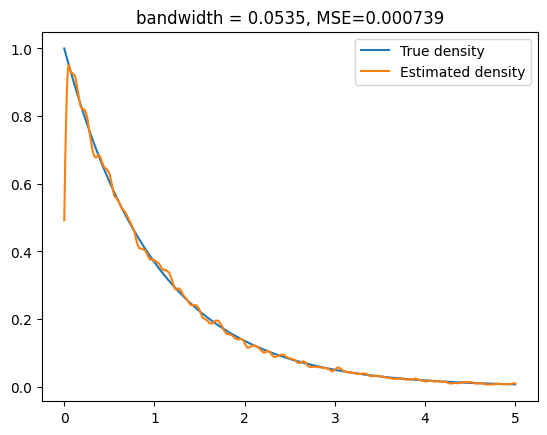

KDE with bandwidth=0.0535 and kernel=cosine:
MSE error: 0.000806, total log-likelihood: -2519.050972


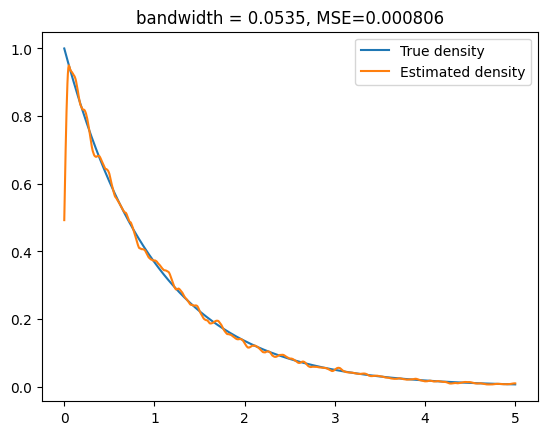

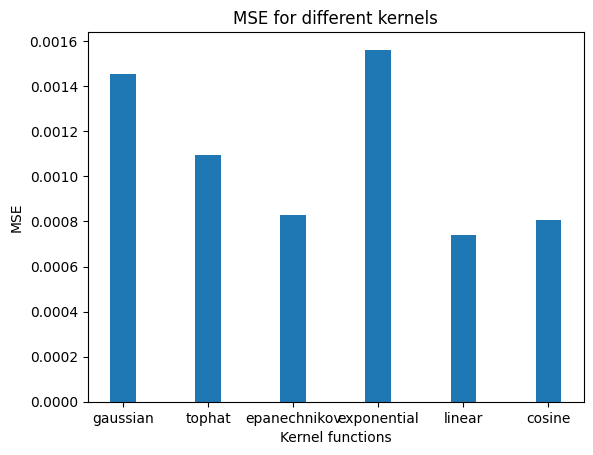

In [14]:
# generate values from exponential distribution
x_values = np.random.exponential(scale=1.0, size=50000).reshape(-1, 1)
x_plot = np.linspace(0, 5, 1000)[:, np.newaxis]

# Compute the actual probabilities using the normal exponential
true_dens = expon.pdf(x_plot, scale=1.0)
mse_results = []
total_log_likelihood_results = []

# testing all kernel functions for normal distribution, with bw = 0.0535
for kernel in kernels:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=0.0535, kernel=kernel)
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

plt.bar(kernels, mse_results, width = 0.3)
plt.xlabel("Kernel functions")
plt.ylabel("MSE")
plt.title("MSE for different kernels")
plt.show()

KDE with bandwidth=0.0535 and kernel=gaussian:
MSE error: 0.000035, total log-likelihood: -3564.482135


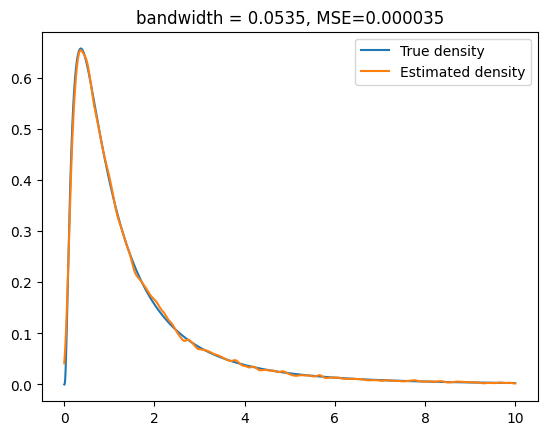

KDE with bandwidth=0.0535 and kernel=tophat:
MSE error: 0.000020, total log-likelihood: -3571.436525


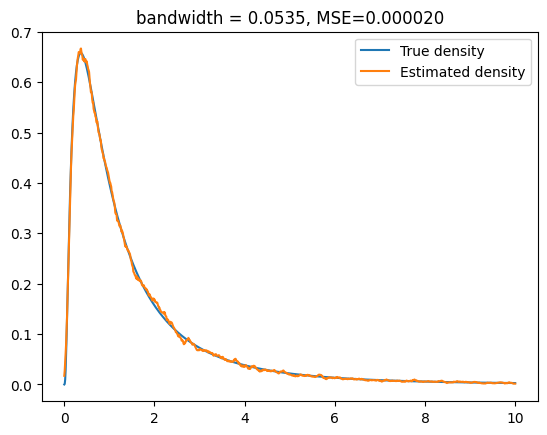

KDE with bandwidth=0.0535 and kernel=epanechnikov:
MSE error: 0.000019, total log-likelihood: -3575.262153


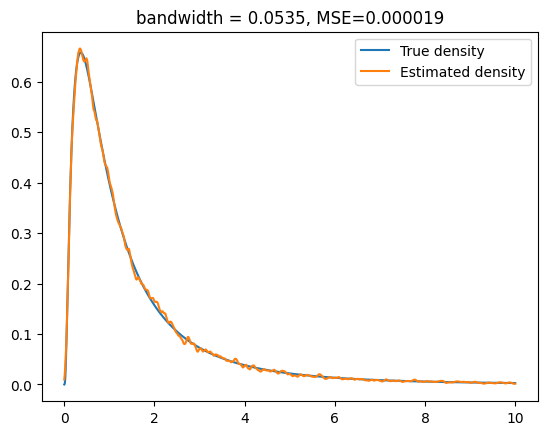

KDE with bandwidth=0.0535 and kernel=exponential:
MSE error: 0.000060, total log-likelihood: -3562.795336


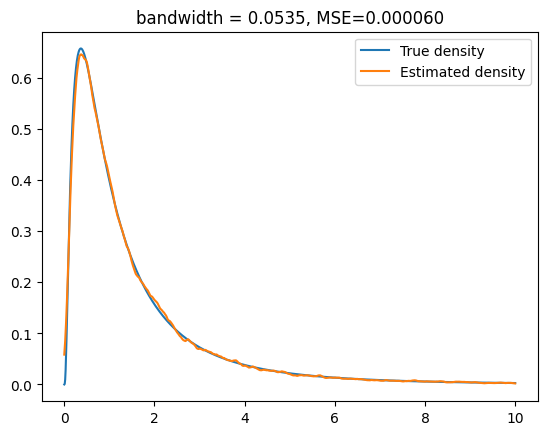

KDE with bandwidth=0.0535 and kernel=linear:
MSE error: 0.000020, total log-likelihood: -3576.967077


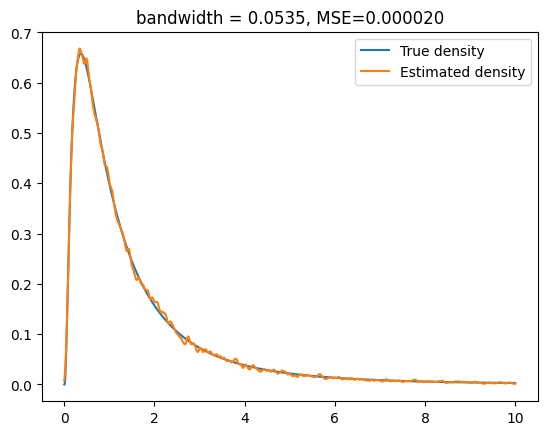

KDE with bandwidth=0.0535 and kernel=cosine:
MSE error: 0.000019, total log-likelihood: -3575.719905


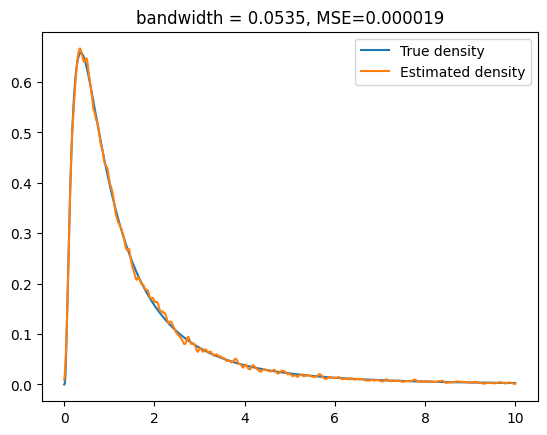

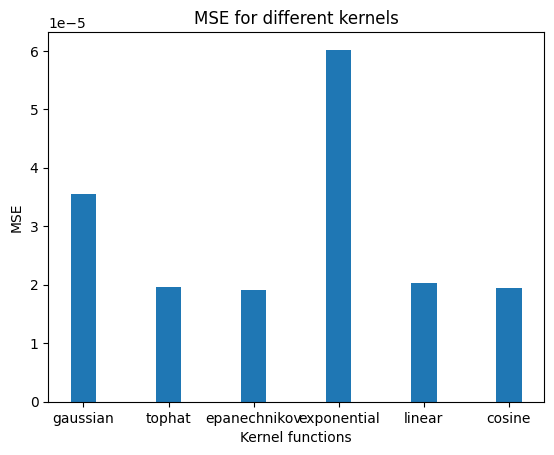

In [15]:
# generate values from lognormal distribution
x_values = np.random.lognormal(size=50000).reshape(-1, 1)
x_plot = np.linspace(0, 10, 1000)[:, np.newaxis]

# Compute the actual probabilities using the lognormal exponential
true_dens = lognorm.pdf(x_plot, s=1.0)
mse_results = []
total_log_likelihood_results = []

# testing all kernel functions for normal distribution, with bw = 0.0535
for kernel in kernels:
  mse, total_log_likelihood = kde_fit(x_values, true_dens, x_plot, bandwidth=0.0535, kernel=kernel)
  mse_results.append(mse)
  total_log_likelihood_results.append(total_log_likelihood)

plt.bar(kernels, mse_results, width = 0.3)
plt.xlabel("Kernel functions")
plt.ylabel("MSE")
plt.title("MSE for different kernels")
plt.show()

In [16]:
def dataset_kde(dataset_name, column_name, grid_search_bw=None):
  print(f"KDE and Histogram for {column_name} from {dataset_name} dataset")
  # Load the dataset from CSV file
  data = pd.read_csv(dataset_name)
  # Extract the relevant column as a NumPy array
  column_data = np.array(data[column_name])
  # Remove NaN values
  column_data = column_data[~np.isnan(column_data)]
  # x_train, x_test = train_test_split(sale_price, test_size=0.4)
  max_value = max(column_data)
  data_range = (0, max_value)

  # Plot the histogram and KDE
  def plot_histogram_kde(x_range, estimated_dens, bw):
    fig, ax = plt.subplots()
    ax.hist(column_data, bins='auto', range=data_range, density=True, alpha=0.5)
    bw_label = f'bw = {bw:.4f}' if type(bw) != str else f'bw = {bw}'
    ax.plot(x_range, estimated_dens, linewidth=3, alpha=0.5, label=bw_label)
    ax.set_xlabel('Data')
    ax.set_ylabel('Probability Density')
    ax.legend(['KDE', 'Histogram'])
    ax.set_title(f'bw = {bw}')
  
  bandwidths = list(np.round(np.linspace(0.01, 0.7, 10), 6))
  bandwidths.extend(['scott', 'silverman'])

  # apply KDE on the data
  x_range = np.linspace(0, max_value, 1000)
  # create the KDE model for different bandwidths
  for bw in bandwidths:
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(column_data.reshape(-1, 1))
    # estimate log of densities on test data
    log_dens = kde.score_samples(x_range.reshape(-1,1))
    # estimated densities on test data
    estimated_dens = np.exp(log_dens)

    # plot the histogram and KDE
    plot_histogram_kde(x_range, estimated_dens, bw)

  # grid search
  grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                      {'bandwidth': np.linspace(0.01, 0.7, 20)},
                      cv=5) # 5-fold cross-validation

  if grid_search_bw == None:
    grid.fit(column_data.reshape(-1, 1))
    grid_search_bw = grid.best_params_["bandwidth"]
  print(f'grid search best bw = {grid_search_bw}')
  kde = KernelDensity(kernel='gaussian', bandwidth=grid_search_bw).fit(column_data.reshape(-1, 1))
  log_dens = kde.score_samples(x_range.reshape(-1,1))
  estimated_dens = np.exp(log_dens)
  plot_histogram_kde(x_range, estimated_dens, grid_search_bw)


  # create train and test sets for performance evaluation
  x_train, x_test = train_test_split(column_data, test_size=0.4)

  # predict PDF value according to histogram baseline  
  counts, bin_edges = np.histogram(x_train, bins='auto', range=data_range)
  bin_indices = [np.searchsorted(counts, value) for value in x_test]
  bin_widths = np.array([counts[bin_index] - counts[bin_index - 1] for bin_index in bin_indices])
  hist_estimated_dens = [1 / (len(x_train) * bin_widths)]
  hist_total_log_likelihood = np.sum(np.log(hist_estimated_dens))

  # predict PDF value according to KDE train on train set

  # scott
  kde_scott = KernelDensity(kernel='gaussian', bandwidth='scott').fit(x_train.reshape(-1, 1))
  # estimate log of densities on test data
  kde_scott_log_dens = kde_scott.score_samples(x_test.reshape(-1,1))
  # estimated densities on test data
  kde_scott_estimated_dens = np.exp(kde_scott_log_dens)
  kde_scott_total_log_likelihood = np.sum(kde_scott_log_dens)

  # silverman
  kde_silverman = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(x_train.reshape(-1, 1))
  # estimate log of densities on test data
  kde_silverman_log_dens = kde_silverman.score_samples(x_test.reshape(-1,1))
  # estimated densities on test data
  kde_silverman_estimated_dens = np.exp(kde_silverman_log_dens)
  kde_silverman_total_log_likelihood = np.sum(kde_silverman_log_dens)

  # grid search cv
  kde_gridsearchcv = KernelDensity(kernel='gaussian', bandwidth=grid_search_bw).fit(x_train.reshape(-1, 1))
  # estimate log of densities on test data
  kde_gridsearchcv_log_dens = kde_gridsearchcv.score_samples(x_test.reshape(-1,1))
  # estimated densities on test data
  kde_gridsearchcv_estimated_dens = np.exp(kde_gridsearchcv_log_dens)
  kde_gridsearchcv_total_log_likelihood = np.sum(kde_gridsearchcv_log_dens)

  # print total log-likelihood of KDE compared to baseline
  print(f'total log-likelihood: histogram = {hist_total_log_likelihood}')
  print(f'total log-likelihood: KDE (Scott) = {kde_scott_total_log_likelihood}')
  print(f'total log-likelihood: KDE (Silverman) = {kde_silverman_total_log_likelihood}')
  print(f'total log-likelihood: KDE (GridSearchCV) = {kde_gridsearchcv_total_log_likelihood}')

KDE and Histogram for AveragePrice from avocado_prices.csv dataset
grid search best bw = 0.155
total log-likelihood: histogram = -73984.91868338257
total log-likelihood: KDE (Scott) = -3496.894909471186
total log-likelihood: KDE (Silverman) = -3513.0016274688787
total log-likelihood: KDE (GridSearchCV) = -3495.827808529287


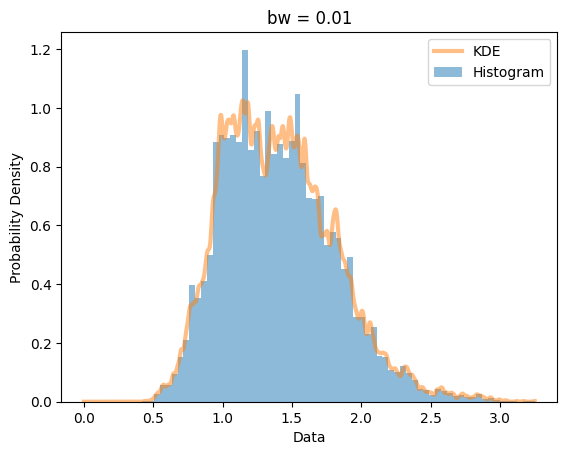

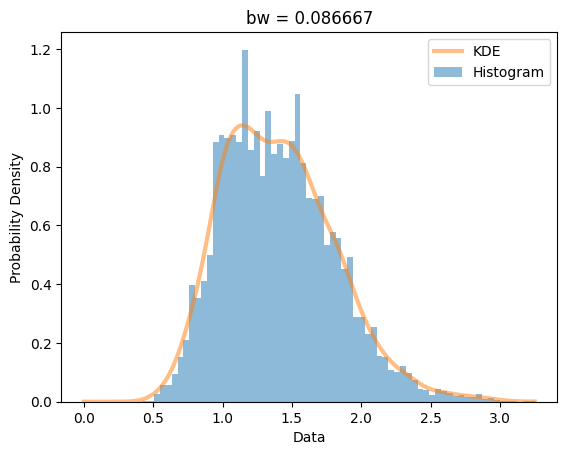

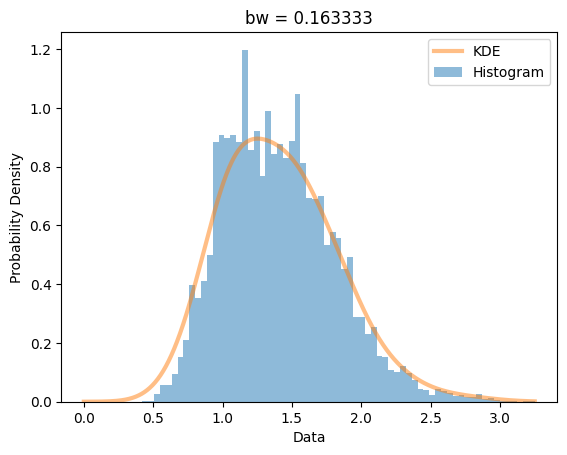

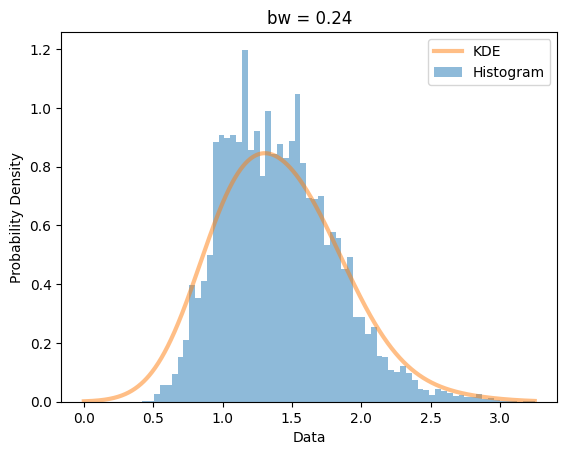

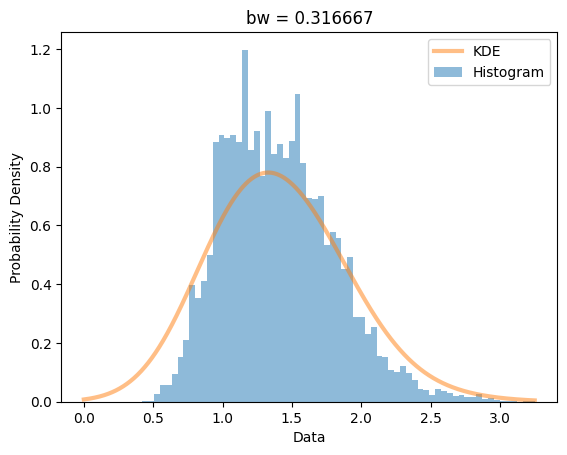

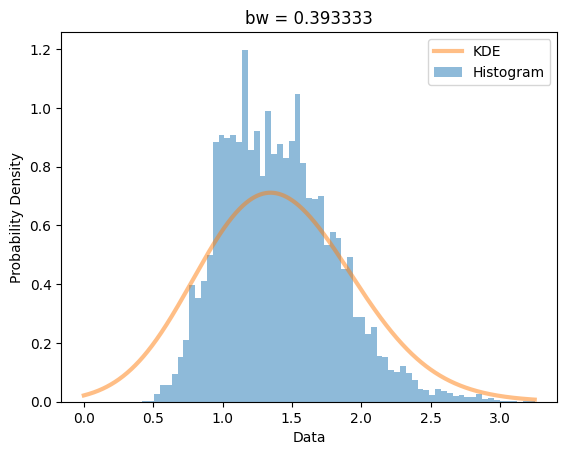

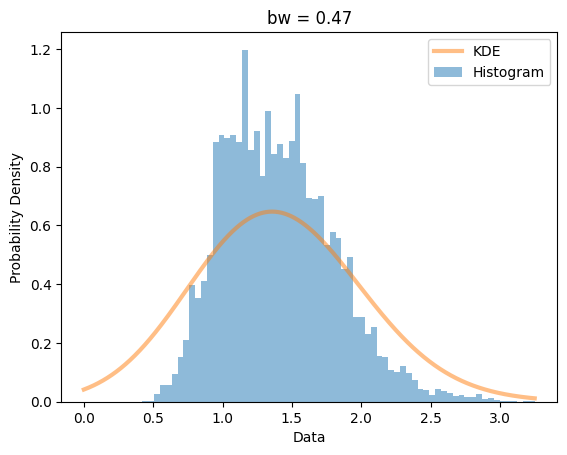

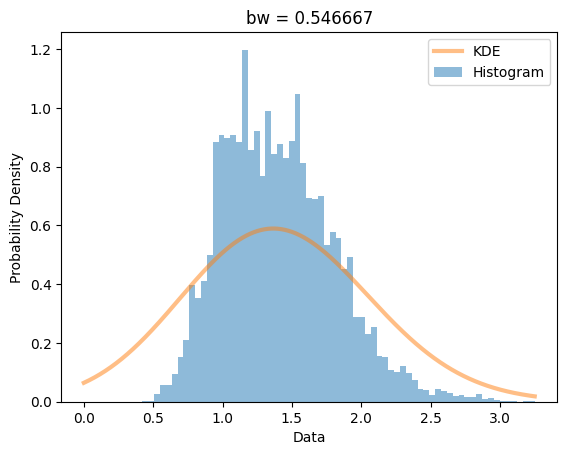

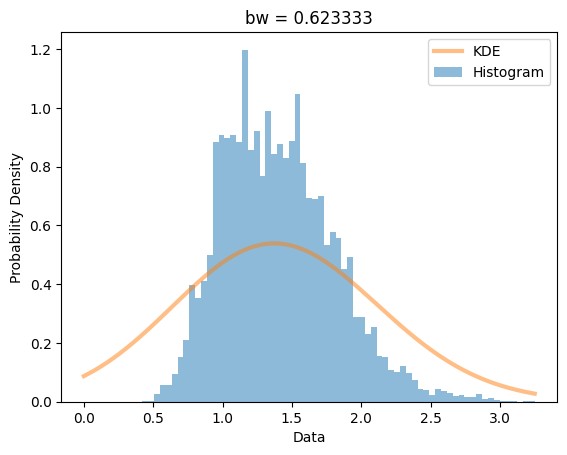

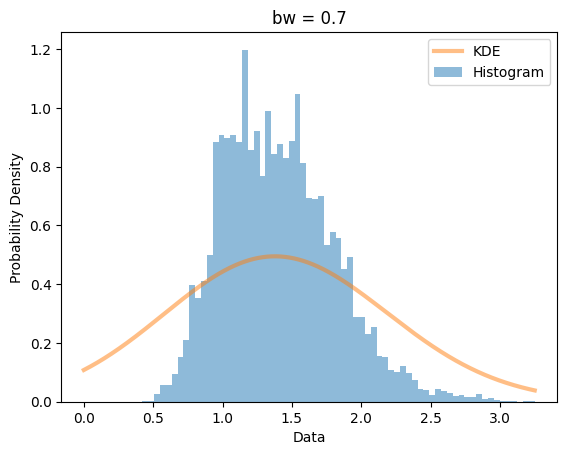

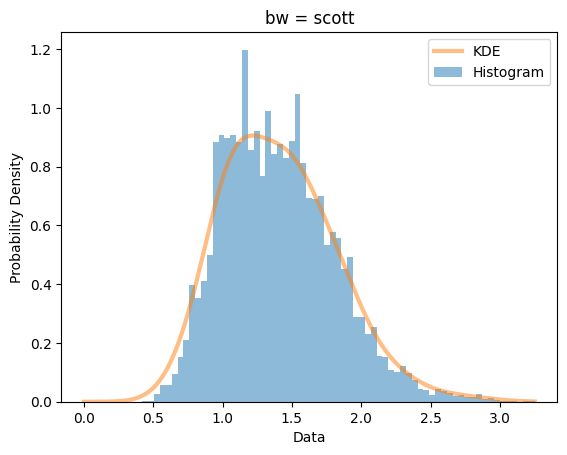

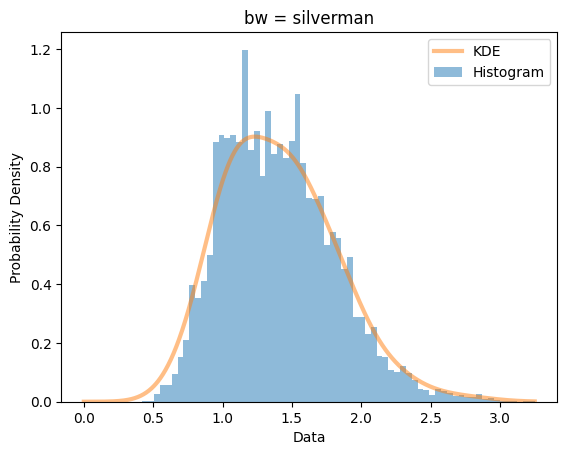

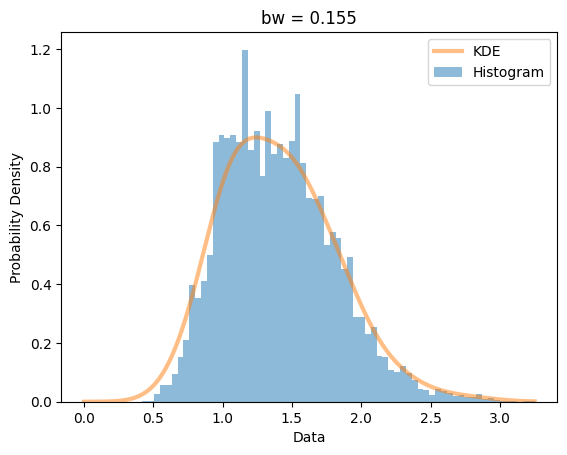

In [17]:
dataset_kde('avocado_prices.csv', 'AveragePrice', grid_search_bw=0.155) # precomputed value
# uncomment to run grid search
# dataset_kde('avocado_prices.csv', 'AveragePrice')

KDE and Histogram for danceability from spotify_songs.csv dataset


/var/folders/mv/55p0wwn94s17lr5ynbgn91hh0000gn/T/ipykernel_90004/1950955464.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_name)


grid search best bw = 0.01
total log-likelihood: histogram = -183349.5674033776
total log-likelihood: KDE (Scott) = 6347.692383639493
total log-likelihood: KDE (Silverman) = 6151.860385944479
total log-likelihood: KDE (GridSearchCV) = 7939.080732203956


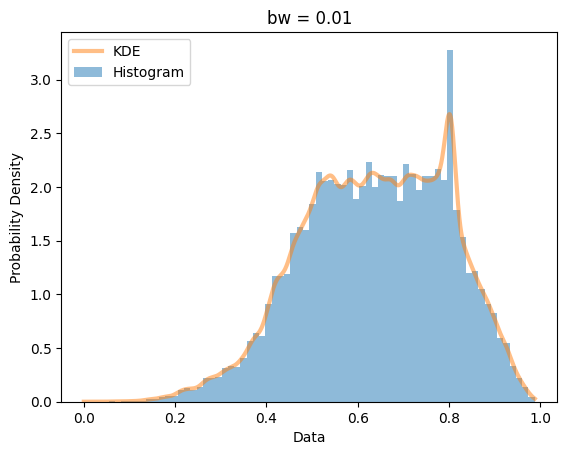

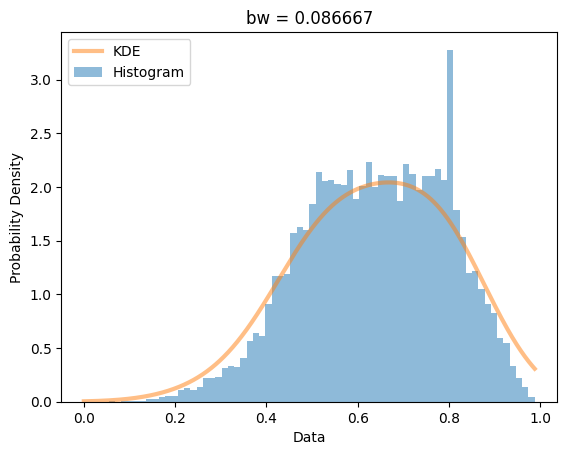

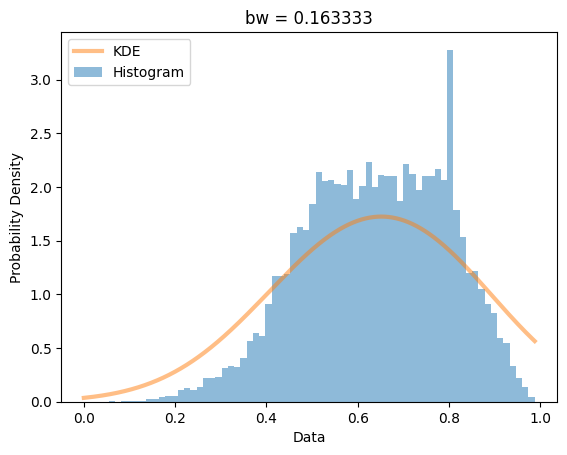

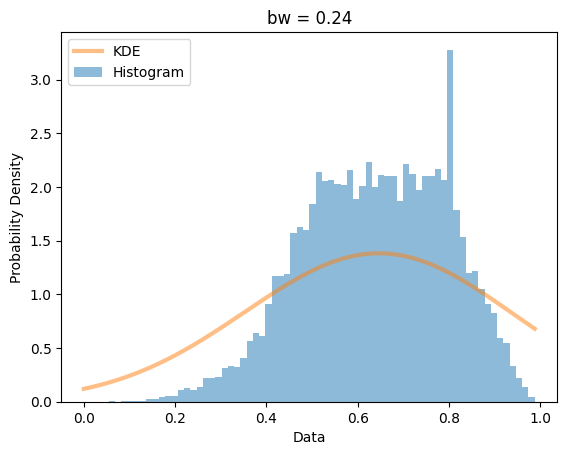

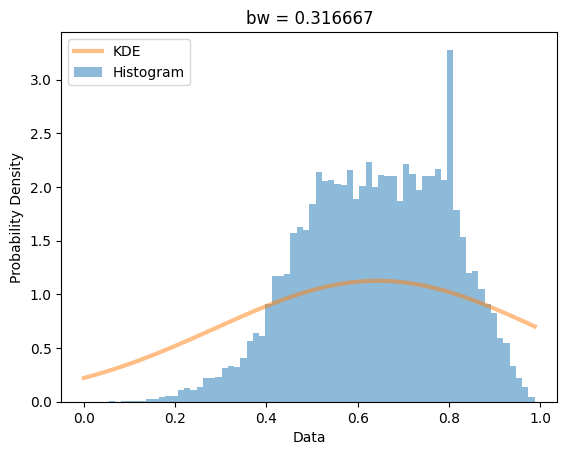

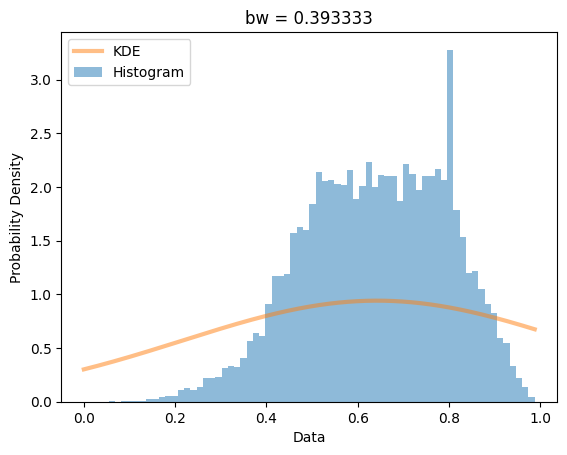

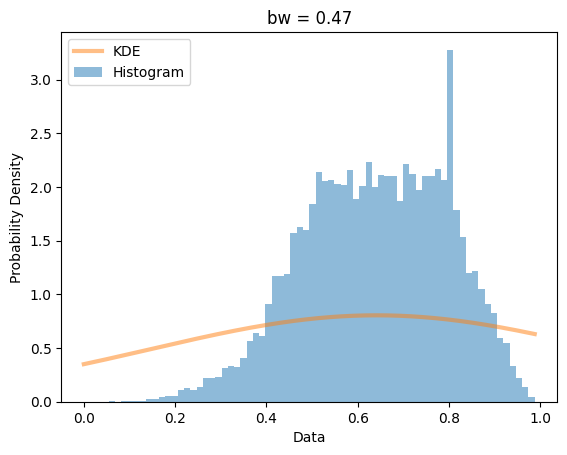

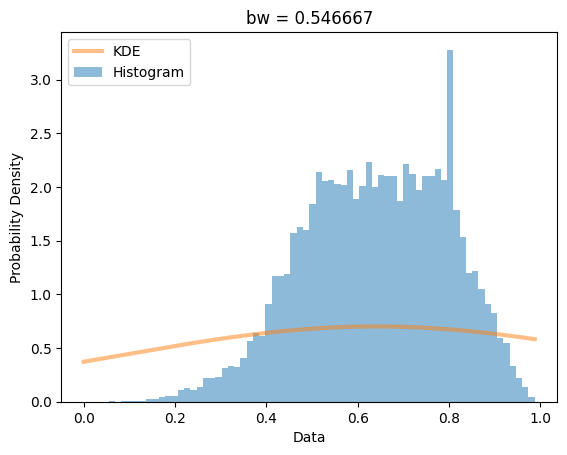

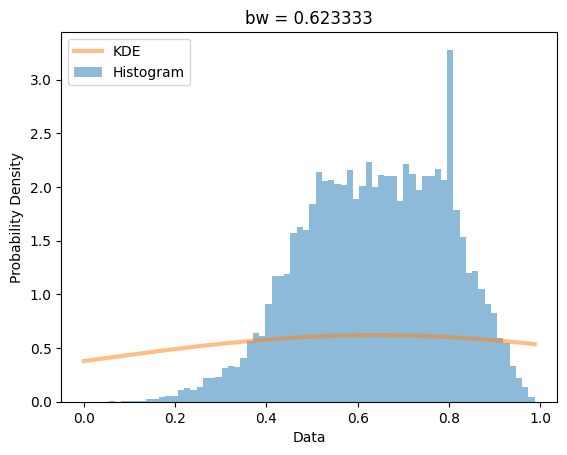

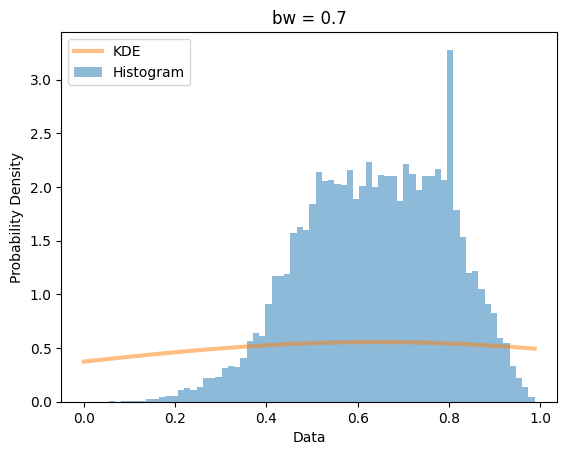

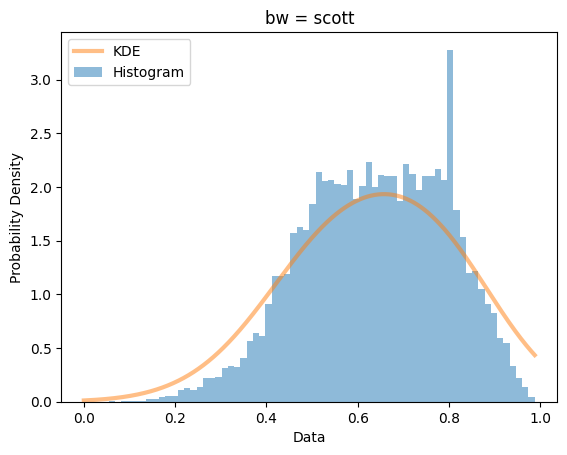

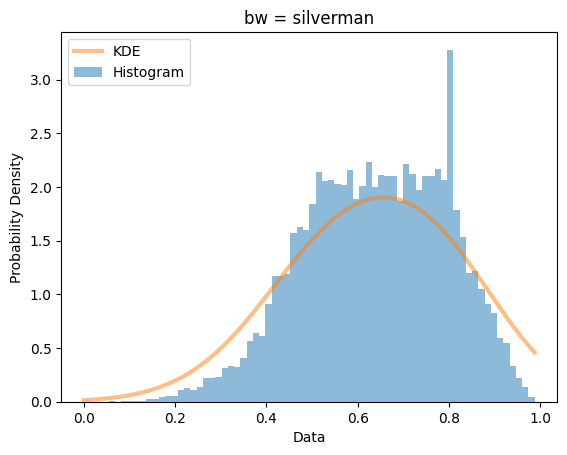

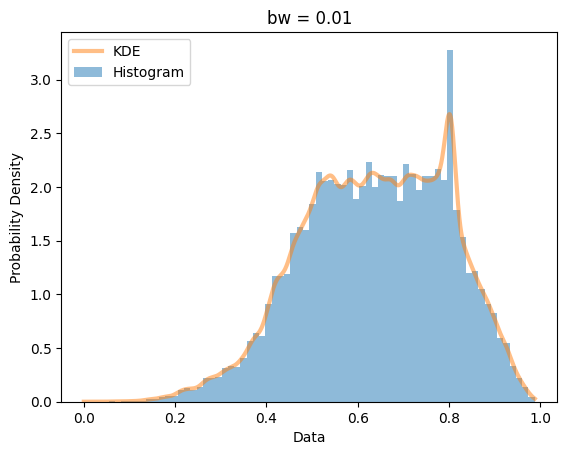

In [18]:
dataset_kde('spotify_songs.csv', 'danceability', grid_search_bw=0.01) # precomputed value
# uncomment to run grid search
# dataset_kde('spotify_songs.csv', 'danceability')

KDE and Histogram for rating from action_movie_ratings_imdb.csv dataset
grid search best bw = 0.01
total log-likelihood: histogram = -139079.92357323732
total log-likelihood: KDE (Scott) = -20251.90584261572
total log-likelihood: KDE (Silverman) = -20251.945130189888
total log-likelihood: KDE (GridSearchCV) = -3980.471256159046


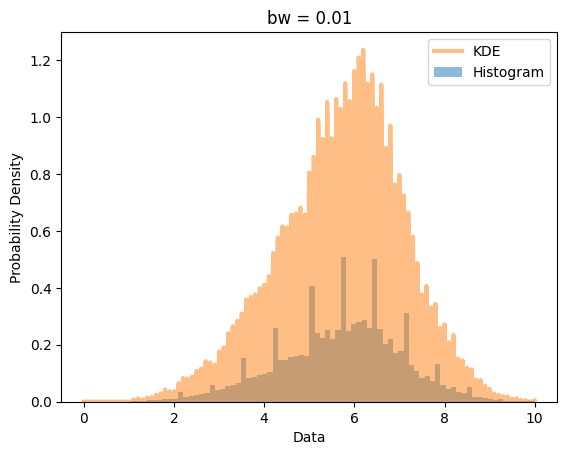

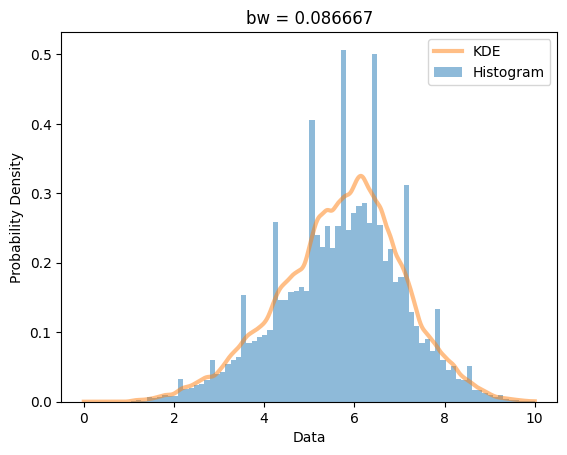

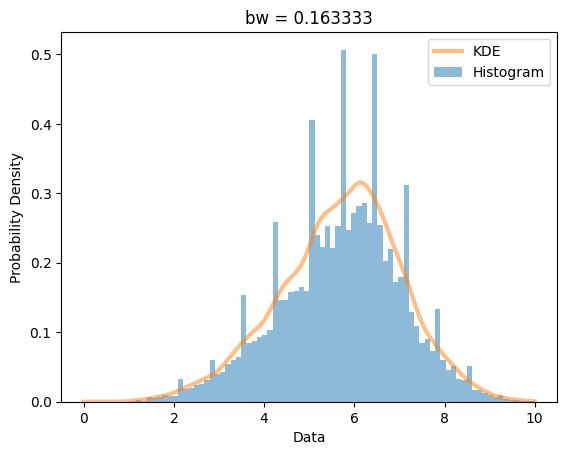

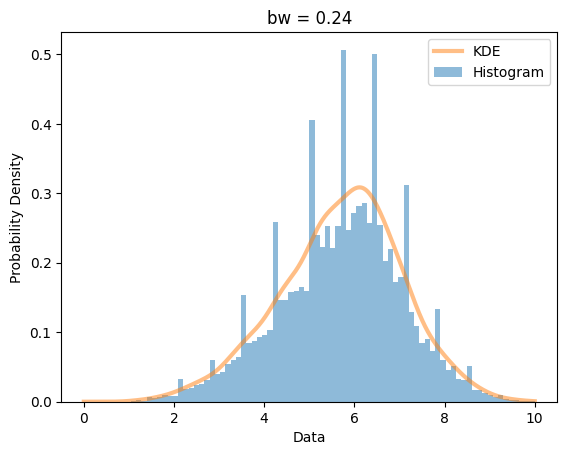

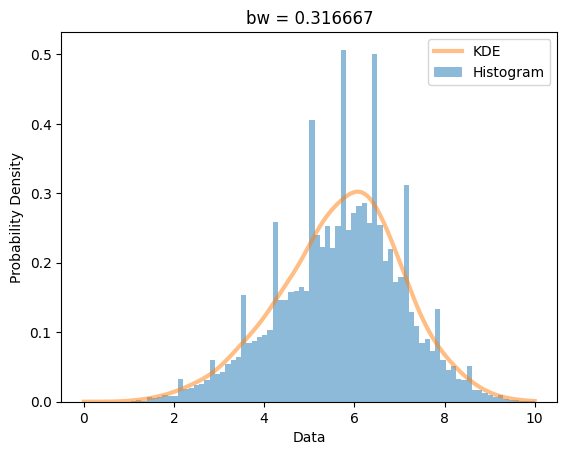

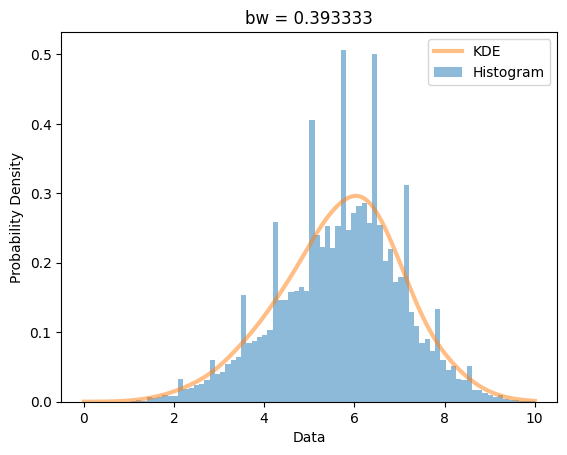

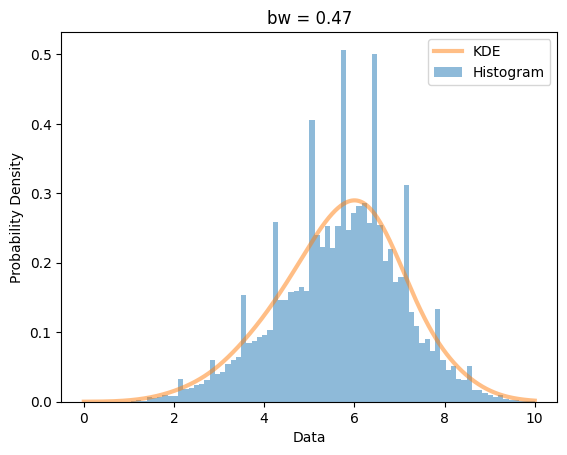

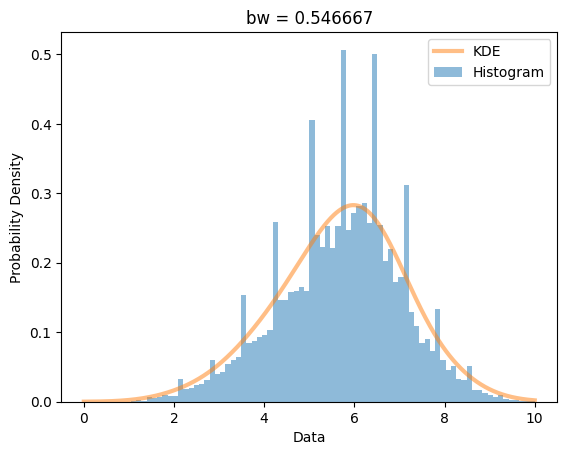

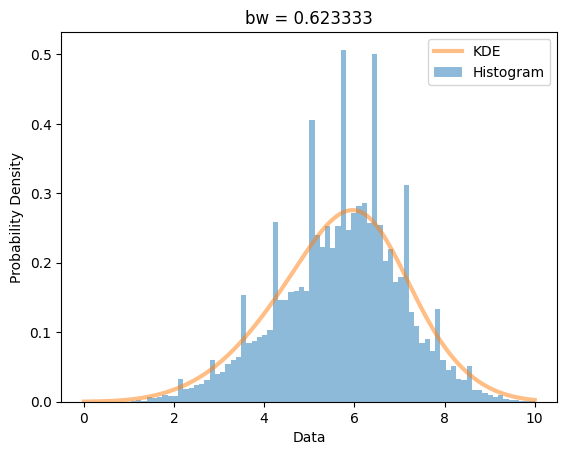

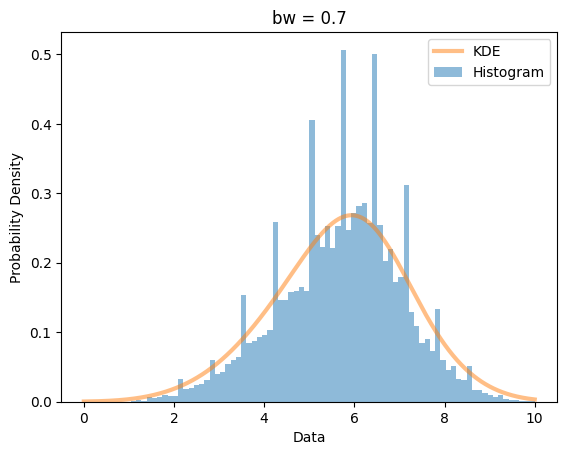

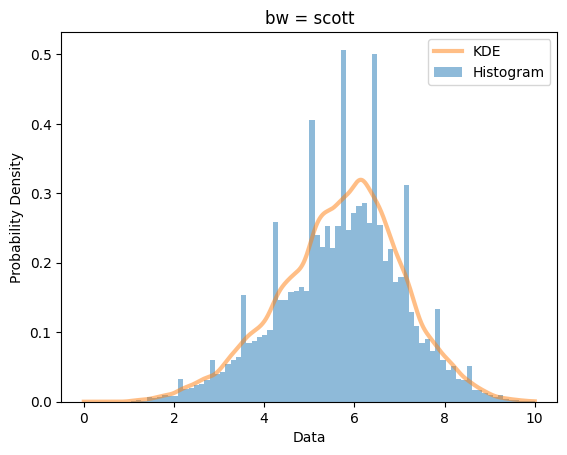

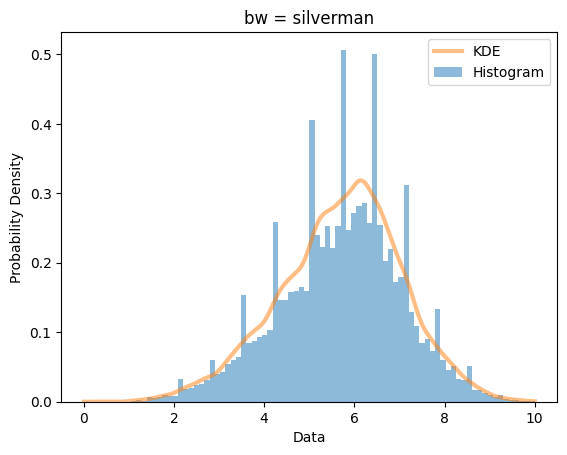

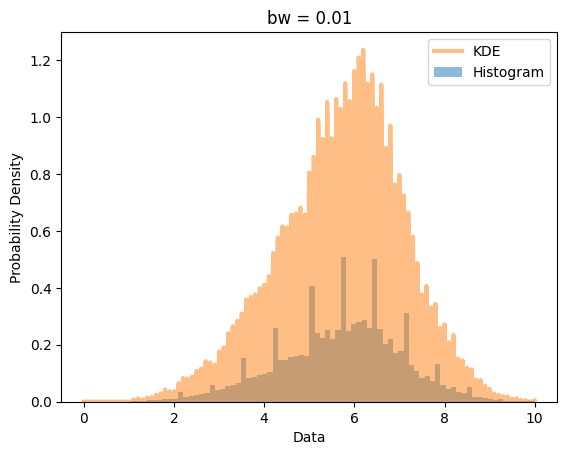

In [19]:
dataset_kde('action_movie_ratings_imdb.csv', 'rating', grid_search_bw=0.01) # precomputed value
# uncomment to run gridsearch
# dataset_kde('action_movie_ratings_imdb.csv', 'rating')

KDE and Histogram for absolute_magnitude from neo.csv dataset
grid search best bw = 0.01
total log-likelihood: histogram = -507405.50899512187
total log-likelihood: KDE (Scott) = -89492.93562582681
total log-likelihood: KDE (Silverman) = -89498.87346446872
total log-likelihood: KDE (GridSearchCV) = -65114.298471806665


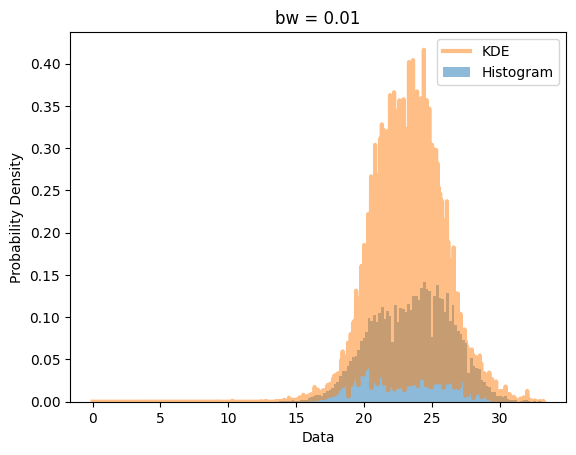

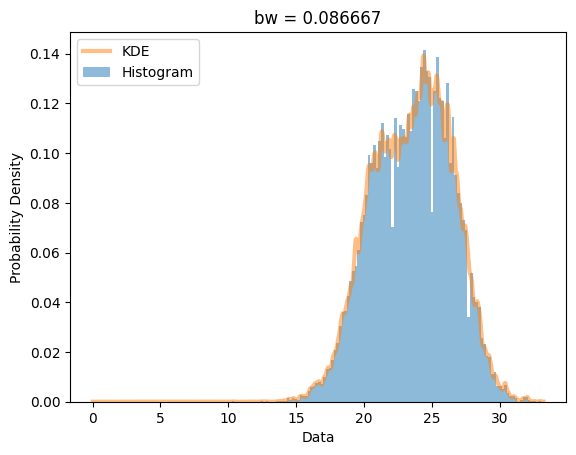

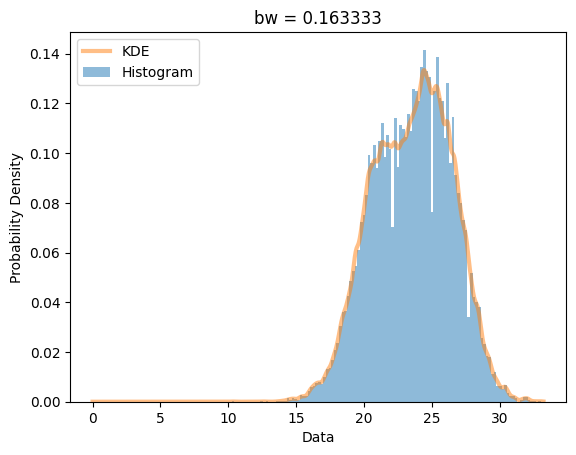

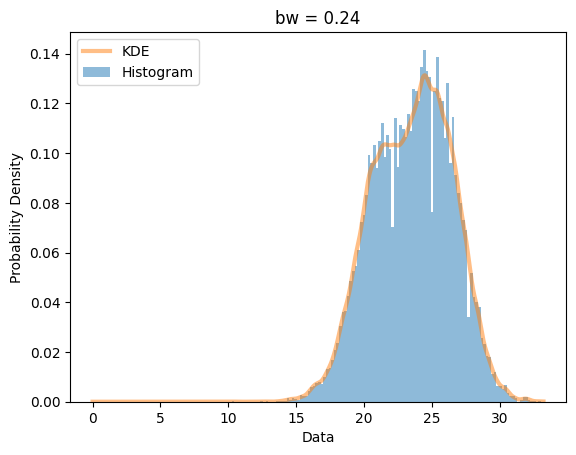

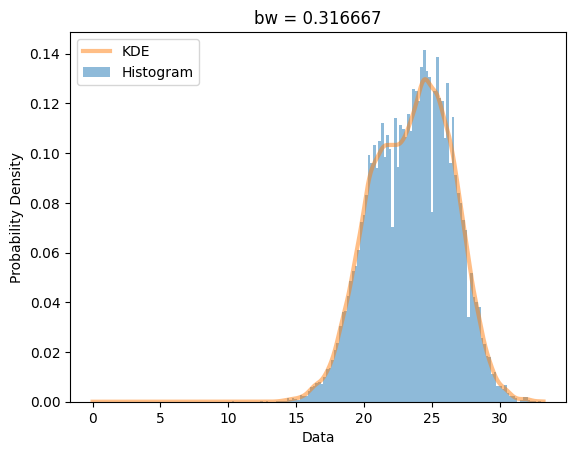

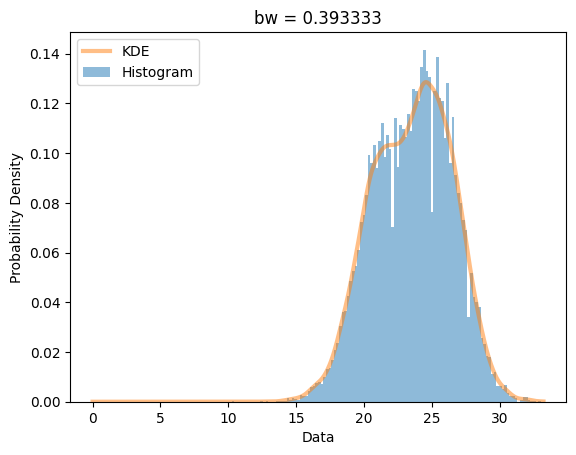

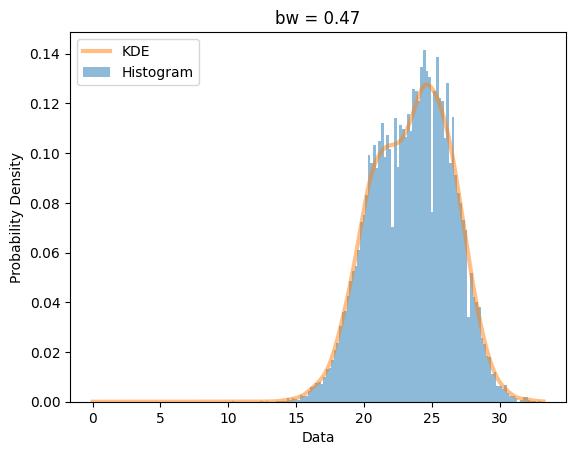

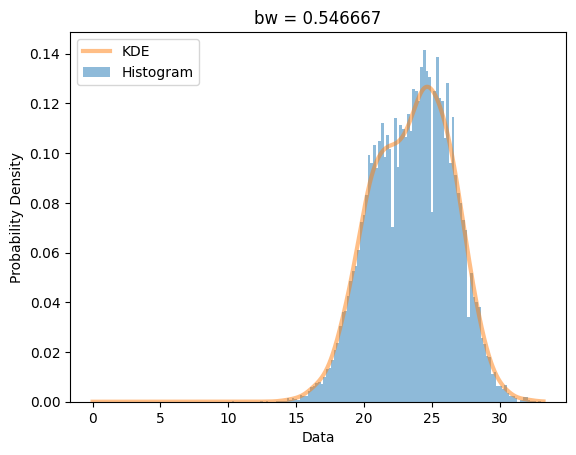

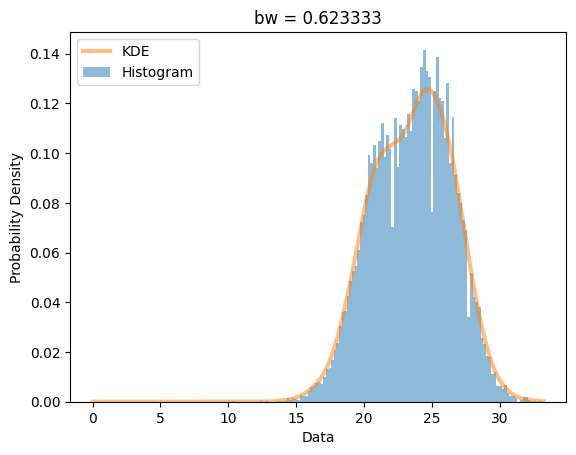

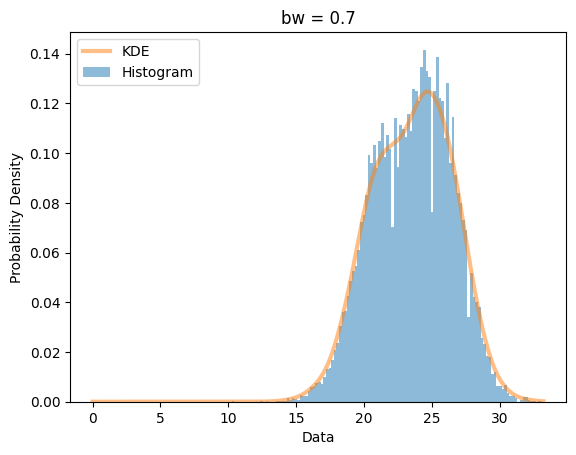

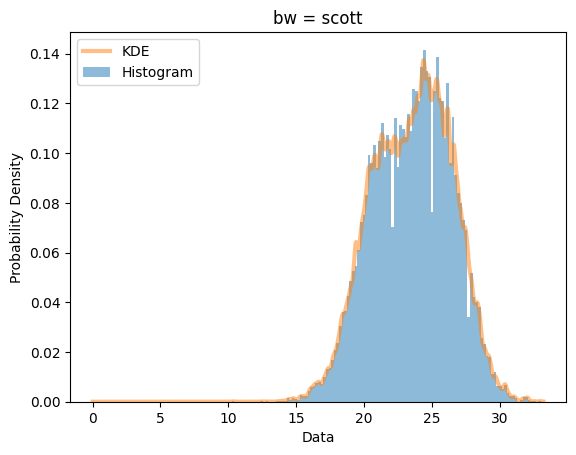

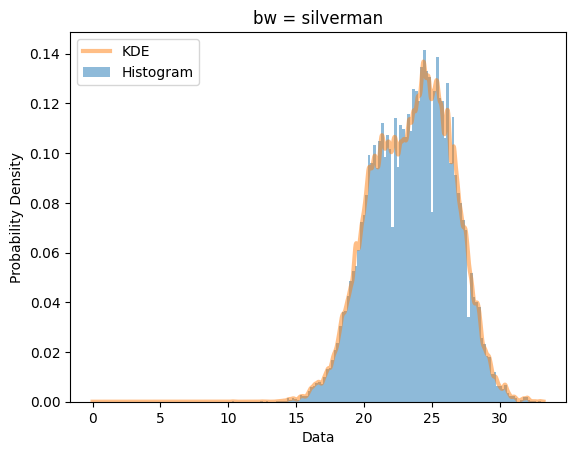

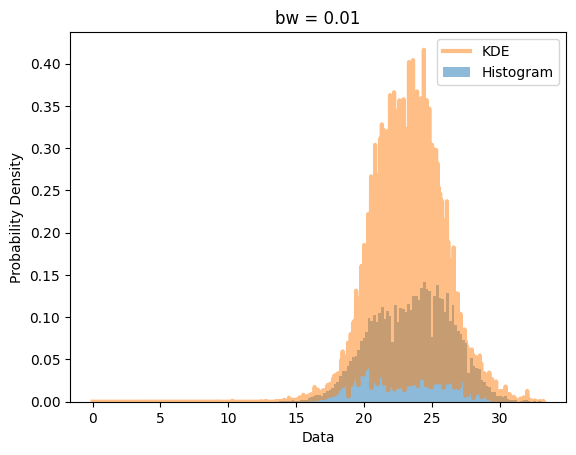

In [20]:
dataset_kde('neo.csv', 'absolute_magnitude', grid_search_bw=0.01) # precomputed value
# uncomment to run gridsearch
# dataset_kde('neo.csv', 'absolute_magnitude')